
# Assignment -  Telecom Churn Case Study 

### Problem Statement:



In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [1]:
##Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Hide warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_rows", 50000, "display.max_columns", None, "display.max_colwidth", None,"display.max_info_columns", 5000)

pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [2]:
## Read the data from CSV file 

telecom = pd.read_csv("C:/Users/Nivedita/Documents/Quotient Documents/Personal/upgrad/ML II/Assignment_telecom churn study/telecom_churn_data.csv")

## Data Understanding

In [3]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109            0.00            0.00            0.00   
1     7001865778        109            0.00            0.00            0.00   
2     7001625959        109            0.00            0.00            0.00   
3     7001204172        109            0.00            0.00            0.00   
4     7000142493        109            0.00            0.00            0.00   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0            9/30/2014  197.38  214.82  213.80   21.10          nan   
1            9/30/2014   34.05  355.07  268.32   86.28        24.11   
2            9/30/2014  167.69  189.06  210.23  290.71        11.54   
3            9/30/2014  221.34  251.10  508.05  389.50        99.91   
4            9/30/2014  261.64  309.88  238.17  163.43        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan         0.00          nan           nan           nan   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           nan            nan            nan           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan           0.00            nan   
1           0.00           0.00           0.00           0.00           0.00   
2          38.49           0.00           0.00           0.00          70.94   
3           0.00           0.00          28.09          39.04           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan              0.00               nan   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan              0.00               nan   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan              0.00               nan   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06  

In [6]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count       99999.00   99999.00        98981.00        98981.00   
mean   7001207270.39     109.00            0.00            0.00   
std        695669.39       0.00            0.00            0.00   
min    7000000074.00     109.00            0.00            0.00   
25%    7000606232.50     109.00            0.00            0.00   
50%    7001204632.00     109.00            0.00            0.00   
75%    7001812030.50     109.00            0.00            0.00   
max    7002410905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
count        98981.00 99999.00 99999.00 99999.00 99999.00     96062.00   
mean             0.00   282.99   278.54   279.15   261.65       132.40   
std              0.00   328.44   338.16   344.47   342.00       297.21   
min              0.00 -2258.71 -2014.05  -945.81 -1899.51         0.00   
25%              0.00    93.41    86.98    84.13    62.69         7.38   
50%              0.00   197.70   191.64   192.08   176.85        34.31   
75%              0.00   371.06   365.34   369.37   353.47       118.74   
max              0.00 27731.09 35145.83 33543.62 38805.62      7376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count     96140.00     94621.00     92254.00      96062.00      96140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
25%           6.66         6.46         5.33         34.73         32.19   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.82   
max        8157.78     10752.56     10427.46       8362.36       9667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count      94621.00      92254.00       96062.00       96140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
25%           31.63         27.13           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
max        14007.34      10310.76       13724.38       15371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count       94621.00       92254.00       96062.00       96140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max         13095.36        8464.03        3775.11        2812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count       94621.00       92254.00          96062.00          96140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max          5337.04        4428.46           6431.33           7400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count          94621.00          92254.00          96062.00         

In [7]:
## Check if Mobile number is Unique in dataset
telecom.mobile_number.nunique()

99999

Mobile number is unique in dataset

## Data Cleaning

### Handling Missing Values

#### Checking the percentage of missing values


In [8]:
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number               0.00
circle_id                   0.00
loc_og_t2o_mou              1.02
std_og_t2o_mou              1.02
loc_ic_t2o_mou              1.02
last_date_of_month_6        0.00
last_date_of_month_7        0.60
last_date_of_month_8        1.10
last_date_of_month_9        1.66
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t

#### Check the columns having missing values one by one

In [9]:
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count       99999.00   99999.00        98981.00        98981.00   
mean   7001207270.39     109.00            0.00            0.00   
std        695669.39       0.00            0.00            0.00   
min    7000000074.00     109.00            0.00            0.00   
25%    7000606232.50     109.00            0.00            0.00   
50%    7001204632.00     109.00            0.00            0.00   
75%    7001812030.50     109.00            0.00            0.00   
max    7002410905.00     109.00            0.00            0.00   

       loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
count        98981.00 99999.00 99999.00 99999.00 99999.00     96062.00   
mean             0.00   282.99   278.54   279.15   261.65       132.40   
std              0.00   328.44   338.16   344.47   342.00       297.21   
min              0.00 -2258.71 -2014.05  -945.81 -1899.51         0.00   
25%              0.00    93.41    86.98    84.13    62.69         7.38   
50%              0.00   197.70   191.64   192.08   176.85        34.31   
75%              0.00   371.06   365.34   369.37   353.47       118.74   
max              0.00 27731.09 35145.83 33543.62 38805.62      7376.71   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count     96140.00     94621.00     92254.00      96062.00      96140.00   
mean        133.67       133.02       130.30        197.94        197.05   
std         308.79       308.95       308.48        316.85        325.86   
min           0.00         0.00         0.00          0.00          0.00   
25%           6.66         6.46         5.33         34.73         32.19   
50%          32.33        32.36        29.84         96.31         91.73   
75%         115.59       115.86       112.13        231.86        226.82   
max        8157.78     10752.56     10427.46       8362.36       9667.13   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count      94621.00      92254.00       96062.00       96140.00   
mean         196.57        190.34           9.95           7.15   
std          327.17        319.40          72.83          73.45   
min            0.00          0.00           0.00           0.00   
25%           31.63         27.13           0.00           0.00   
50%           92.14         87.29           0.00           0.00   
75%          228.26        220.50           0.00           0.00   
max        14007.34      10310.76       13724.38       15371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count       94621.00       92254.00       96062.00       96140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max         13095.36        8464.03        3775.11        2812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count       94621.00       92254.00          96062.00          96140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max          5337.04        4428.46           6431.33           7400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count          94621.00          92254.00          96062.00         

#### 1) Columns with ALL Zero or Null Values

#### As we see from describe(), all values of below columns are 0 or NULL. We can confirm this by checking unique value count & drop these columns 
- loc_og_t2o_mou
- std_og_t2o_mou
- loc_ic_t2o_mou

- std_og_t2c_mou_6
- std_og_t2c_mou_7
- std_og_t2c_mou_8
- std_og_t2c_mou_9

- std_ic_t2o_mou_6	
- std_ic_t2o_mou_7	
- std_ic_t2o_mou_8	
- std_ic_t2o_mou_9	

In [10]:
## Check the Unique values in the above columns before dropping them
telecom_zero_value_columns = telecom[["loc_og_t2o_mou", "std_og_t2o_mou","loc_ic_t2o_mou","std_og_t2c_mou_6", "std_og_t2c_mou_7", "std_og_t2c_mou_8", 
                                    "std_og_t2c_mou_9","std_ic_t2o_mou_6", "std_ic_t2o_mou_7" , "std_ic_t2o_mou_8", "std_ic_t2o_mou_9"]]
for c in telecom_zero_value_columns.columns:
    print ( c)
    print (telecom_zero_value_columns[c].value_counts())

loc_og_t2o_mou
0.00    98981
Name: loc_og_t2o_mou, dtype: int64
std_og_t2o_mou
0.00    98981
Name: std_og_t2o_mou, dtype: int64
loc_ic_t2o_mou
0.00    98981
Name: loc_ic_t2o_mou, dtype: int64
std_og_t2c_mou_6
0.00    96062
Name: std_og_t2c_mou_6, dtype: int64
std_og_t2c_mou_7
0.00    96140
Name: std_og_t2c_mou_7, dtype: int64
std_og_t2c_mou_8
0.00    94621
Name: std_og_t2c_mou_8, dtype: int64
std_og_t2c_mou_9
0.00    92254
Name: std_og_t2c_mou_9, dtype: int64
std_ic_t2o_mou_6
0.00    96062
Name: std_ic_t2o_mou_6, dtype: int64
std_ic_t2o_mou_7
0.00    96140
Name: std_ic_t2o_mou_7, dtype: int64
std_ic_t2o_mou_8
0.00    94621
Name: std_ic_t2o_mou_8, dtype: int64
std_ic_t2o_mou_9
0.00    92254
Name: std_ic_t2o_mou_9, dtype: int64


In [11]:
## Since its comfirmed that above columns contain either 0 or NULL values , we can safely drop them
telecom.drop(telecom_zero_value_columns, axis =1 , inplace = True )

#### 2) Last date of Month columns    

#### These date columns are not required for our analysis so lets drop the same

In [12]:
telecom.drop(["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8", "last_date_of_month_9"], axis= 1, inplace=True)

#### 3) Recharge columns with no '0' value
In the recharge variables where there is no 0 value, we can assume that missing values mean 0 that is no recharge is done in that month. .

In [13]:
## Check number of '0' values 
len(telecom[telecom["total_rech_data_6"] == 0].index)
len(telecom[telecom["total_rech_data_7"] == 0].index)
len(telecom[telecom["total_rech_data_8"] == 0].index)
len(telecom[telecom["total_rech_data_9"] == 0].index)
len(telecom[telecom["max_rech_data_6"] == 0].index)
len(telecom[telecom["max_rech_data_7"] == 0].index)
len(telecom[telecom["max_rech_data_8"] == 0].index)
len(telecom[telecom["max_rech_data_9"] == 0].index)


0

0

0

0

0

0

0

0

In [14]:
## The above columns do not contain any value for '0' recharge, 
## so assumming NULL values mean 0 recharge, we will impute the NULL values with 0 .

telecom.loc[telecom.total_rech_data_6.isnull(), "total_rech_data_6"] = 0

telecom.loc[telecom.total_rech_data_7.isnull(), "total_rech_data_7"] = 0

telecom.loc[telecom.total_rech_data_8.isnull(), "total_rech_data_8"] = 0

telecom.loc[telecom.total_rech_data_9.isnull(), "total_rech_data_9"] = 0

telecom.loc[telecom.max_rech_data_6.isnull(), "max_rech_data_6"] = 0

telecom.loc[telecom.max_rech_data_7.isnull(), "max_rech_data_7"] = 0

telecom.loc[telecom.max_rech_data_8.isnull(), "max_rech_data_8"] = 0

telecom.loc[telecom.max_rech_data_9.isnull(), "max_rech_data_9"] = 0

In [15]:
## Check the av_rech_amt_data , count_rech_2g, count_rech_3g when total_rech_data is NULL (now 0) which means 
## Recharge is not done in that month
telecom[telecom["total_rech_data_6"] == 0].av_rech_amt_data_6.unique()
telecom[telecom["total_rech_data_7"] == 0].av_rech_amt_data_7.unique()
telecom[telecom["total_rech_data_8"] == 0].av_rech_amt_data_8.unique()
telecom[telecom["total_rech_data_9"] == 0].av_rech_amt_data_9.unique()

telecom[telecom["total_rech_data_6"] == 0].count_rech_2g_6.unique()
telecom[telecom["total_rech_data_7"] == 0].count_rech_2g_7.unique()
telecom[telecom["total_rech_data_8"] == 0].count_rech_2g_8.unique()
telecom[telecom["total_rech_data_9"] == 0].count_rech_2g_9.unique()

telecom[telecom["total_rech_data_6"] == 0].count_rech_3g_6.unique()
telecom[telecom["total_rech_data_7"] == 0].count_rech_3g_7.unique()
telecom[telecom["total_rech_data_8"] == 0].count_rech_3g_8.unique()
telecom[telecom["total_rech_data_9"] == 0].count_rech_3g_9.unique()



array([nan])

array([nan])

array([nan])

array([nan])

array([nan])

array([nan])

array([nan])

array([nan])

array([nan])

array([nan])

array([nan])

array([nan])

In [16]:
## We can safely impute the values 0 for these recharge columns
telecom.loc[telecom.av_rech_amt_data_6.isnull(), "av_rech_amt_data_6"] = 0
telecom.loc[telecom.av_rech_amt_data_7.isnull(), "av_rech_amt_data_7"] = 0
telecom.loc[telecom.av_rech_amt_data_8.isnull(), "av_rech_amt_data_8"] = 0
telecom.loc[telecom.av_rech_amt_data_9.isnull(), "av_rech_amt_data_9"] = 0

telecom.loc[telecom.count_rech_2g_6.isnull(), "count_rech_2g_6"] = 0
telecom.loc[telecom.count_rech_2g_7.isnull(), "count_rech_2g_7"] = 0
telecom.loc[telecom.count_rech_2g_8.isnull(), "count_rech_2g_8"] = 0
telecom.loc[telecom.count_rech_2g_9.isnull(), "count_rech_2g_9"] = 0

telecom.loc[telecom.count_rech_3g_6.isnull(), "count_rech_3g_6"] = 0
telecom.loc[telecom.count_rech_3g_7.isnull(), "count_rech_3g_7"] = 0
telecom.loc[telecom.count_rech_3g_8.isnull(), "count_rech_3g_8"] = 0
telecom.loc[telecom.count_rech_3g_9.isnull(), "count_rech_3g_9"] = 0


#### 4) Categorical Variables      

In [17]:
## Create a list of categorical columns
categorical_columns = ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

In [18]:
## Check the unique values and count 
for c in telecom[categorical_columns]:
    print ( c)
    print (telecom[c].value_counts())

night_pck_user_6
0.00    24522
1.00      631
Name: night_pck_user_6, dtype: int64
night_pck_user_7
0.00    24982
1.00      589
Name: night_pck_user_7, dtype: int64
night_pck_user_8
0.00    25790
1.00      549
Name: night_pck_user_8, dtype: int64
night_pck_user_9
0.00    25508
1.00      414
Name: night_pck_user_9, dtype: int64
fb_user_6
1.00    23000
0.00     2153
Name: fb_user_6, dtype: int64
fb_user_7
1.00    23238
0.00     2333
Name: fb_user_7, dtype: int64
fb_user_8
1.00    23463
0.00     2876
Name: fb_user_8, dtype: int64
fb_user_9
1.00    22318
0.00     3604
Name: fb_user_9, dtype: int64


In [19]:
# Existing values are '0' or '1' which means the customer is a 'Night pack User' (1) or not (0). Same for 'Facebook User'

# Lets replace missing values with '-1' in categorical columns where '-1' is a new category
telecom[categorical_columns] = telecom[categorical_columns].apply(lambda x: x.fillna(-1))

#### 5) Columns with more than 70% Missing values

In [20]:
## Check missing values %
telecom.isnull().sum()/len(telecom.index) * 100


mobile_number               0.00
circle_id                   0.00
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
arpu_9                      0.00
onnet_mou_6                 3.94
onnet_mou_7                 3.86
onnet_mou_8                 5.38
onnet_mou_9                 7.75
offnet_mou_6                3.94
offnet_mou_7                3.86
offnet_mou_8                5.38
offnet_mou_9                7.75
roam_ic_mou_6               3.94
roam_ic_mou_7               3.86
roam_ic_mou_8               5.38
roam_ic_mou_9               7.75
roam_og_mou_6               3.94
roam_og_mou_7               3.86
roam_og_mou_8               5.38
roam_og_mou_9               7.75
loc_og_t2t_mou_6            3.94
loc_og_t2t_mou_7            3.86
loc_og_t2t_mou_8            5.38
loc_og_t2t_mou_9            7.75
loc_og_t2m_mou_6            3.94
loc_og_t2m_mou_7            3.86
loc_og_t2m_mou_8            5.38
loc_og_t2m_mou_9            7.75
loc_og_t2f

In [21]:
## Since these columns have very high NULL values , we will drop them.
telecom_high_missing_val = telecom[[
                                   "arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_3g_9",
                                   "arpu_2g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9",
                                    "date_of_last_rech_data_6", "date_of_last_rech_data_7",
                                    "date_of_last_rech_data_8", "date_of_last_rech_data_9"
    
                                   ]]

telecom.drop(telecom_high_missing_val, axis = 1, inplace= True)


#### 6) Remaining NULL columns   

In [22]:
telecom.describe()

mobile_number  circle_id   arpu_6   arpu_7   arpu_8   arpu_9  \
count       99999.00   99999.00 99999.00 99999.00 99999.00 99999.00   
mean   7001207270.39     109.00   282.99   278.54   279.15   261.65   
std        695669.39       0.00   328.44   338.16   344.47   342.00   
min    7000000074.00     109.00 -2258.71 -2014.05  -945.81 -1899.51   
25%    7000606232.50     109.00    93.41    86.98    84.13    62.69   
50%    7001204632.00     109.00   197.70   191.64   192.08   176.85   
75%    7001812030.50     109.00   371.06   365.34   369.37   353.47   
max    7002410905.00     109.00 27731.09 35145.83 33543.62 38805.62   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
count     96062.00     96140.00     94621.00     92254.00      96062.00   
mean        132.40       133.67       133.02       130.30        197.94   
std         297.21       308.79       308.95       308.48        316.85   
min           0.00         0.00         0.00         0.00          0.00   
25%           7.38         6.66         6.46         5.33         34.73   
50%          34.31        32.33        32.36        29.84         96.31   
75%         118.74       115.59       115.86       112.13        231.86   
max        7376.71      8157.78     10752.56     10427.46       8362.36   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count      96140.00      94621.00      92254.00       96062.00       96140.00   
mean         197.05        196.57        190.34           9.95           7.15   
std          325.86        327.17        319.40          72.83          73.45   
min            0.00          0.00          0.00           0.00           0.00   
25%           32.19         31.63         27.13           0.00           0.00   
50%           91.73         92.14         87.29           0.00           0.00   
75%          226.82        228.26        220.50           0.00           0.00   
max         9667.13      14007.34      10310.76       13724.38       15371.04   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count       94621.00       92254.00       96062.00       96140.00   
mean            7.29           6.34          13.91           9.82   
std            68.40          57.14          71.44          58.46   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max         13095.36        8464.03        3775.11        2812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count       94621.00       92254.00          96062.00          96140.00   
mean            9.97           8.56             47.10             46.47   
std            64.71          58.44            150.86            155.32   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              1.66              1.63   
50%             0.00           0.00             11.91             11.61   
75%             0.00           0.00             40.96             39.91   
max          5337.04        4428.46           6431.33           7400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count          94621.00          92254.00          96062.00          96140.00   
mean              45.89             44.58             93.34             91.40   
std              151.18            148.00            162.78            157.49   
min                0.00              0.00              0.00              0.00   
25%                1.60              1.36              9.88             10.02   
50%               11.73             11.26             41.03             40.43   
75%               40.11             39.28            110.39            107.56   
max            

If we see the remaining numeric columns which have NULL values, there is pretty good difference between Mean and Median values of each of columns. That indicates there are outliers. In such case, Median is more representative of the values and so we will impute these columns with Median. 

In [23]:
## Create list of all remaining columns in which we want to impute the Median
impute_median_columns = ['onnet_mou_6',
'onnet_mou_7',
'onnet_mou_8',
'onnet_mou_9',
'offnet_mou_6',
'offnet_mou_7',
'offnet_mou_8',
'offnet_mou_9',
'roam_ic_mou_6',
'roam_ic_mou_7',
'roam_ic_mou_8',
'roam_ic_mou_9',
'roam_og_mou_6',
'roam_og_mou_7',
'roam_og_mou_8',
'roam_og_mou_9',
'loc_og_t2t_mou_6',
'loc_og_t2t_mou_7',
'loc_og_t2t_mou_8',
'loc_og_t2t_mou_9',
'loc_og_t2m_mou_6',
'loc_og_t2m_mou_7',
'loc_og_t2m_mou_8',
'loc_og_t2m_mou_9',
'loc_og_t2f_mou_6',
'loc_og_t2f_mou_7',
'loc_og_t2f_mou_8',
'loc_og_t2f_mou_9',
'loc_og_t2c_mou_6',
'loc_og_t2c_mou_7',
'loc_og_t2c_mou_8',
'loc_og_t2c_mou_9',

'std_og_t2t_mou_6',
'std_og_t2t_mou_7',
'std_og_t2t_mou_8',
'std_og_t2t_mou_9',
'std_og_t2m_mou_6',
'std_og_t2m_mou_7',
'std_og_t2m_mou_8',
'std_og_t2m_mou_9',
'std_og_t2f_mou_6',
'std_og_t2f_mou_7',
'std_og_t2f_mou_8',
'std_og_t2f_mou_9',

'isd_og_mou_6',
'isd_og_mou_7',
'isd_og_mou_8',
'isd_og_mou_9',
'spl_og_mou_6',
'spl_og_mou_7',
'spl_og_mou_8',
'spl_og_mou_9',
'og_others_6',
'og_others_7',
'og_others_8',
'og_others_9',
'loc_ic_t2t_mou_6',
'loc_ic_t2t_mou_7',
'loc_ic_t2t_mou_8',
'loc_ic_t2t_mou_9',
'loc_ic_t2m_mou_6',
'loc_ic_t2m_mou_7',
'loc_ic_t2m_mou_8',
'loc_ic_t2m_mou_9',
'loc_ic_t2f_mou_6',
'loc_ic_t2f_mou_7',
'loc_ic_t2f_mou_8',
'loc_ic_t2f_mou_9',

'std_ic_t2t_mou_6',
'std_ic_t2t_mou_7',
'std_ic_t2t_mou_8',
'std_ic_t2t_mou_9',
'std_ic_t2m_mou_6',
'std_ic_t2m_mou_7',
'std_ic_t2m_mou_8',
'std_ic_t2m_mou_9',
'std_ic_t2f_mou_6',
'std_ic_t2f_mou_7',
'std_ic_t2f_mou_8',
'std_ic_t2f_mou_9',

'spl_ic_mou_6',
'spl_ic_mou_7',
'spl_ic_mou_8',
'spl_ic_mou_9',
'isd_ic_mou_6',
'isd_ic_mou_7',
'isd_ic_mou_8',
'isd_ic_mou_9',
'ic_others_6',
'ic_others_7',
'ic_others_8',
'ic_others_9']


In [24]:
## Impute Median value to all the identified columns 
for c in telecom[impute_median_columns]:
 
    col_median = telecom[c].median()
    
    telecom.loc[telecom[c].isnull(), c] =  col_median

Impute the Sum of related columns in the 'Total' columns for the missing values

In [25]:
## Total of local outgoing minutes = sum of local outgoing t2t + t2m + t2f minutes (Note that t2c minutes are not included because they are not charged)

telecom.loc[telecom["loc_og_mou_6"].isnull(), "loc_og_mou_6"] =  telecom.loc_og_t2t_mou_6 + telecom.loc_og_t2m_mou_6 + telecom.loc_og_t2f_mou_6
telecom.loc[telecom["loc_og_mou_7"].isnull(), "loc_og_mou_7"] =  telecom.loc_og_t2t_mou_7 + telecom.loc_og_t2m_mou_7 + telecom.loc_og_t2f_mou_7
telecom.loc[telecom["loc_og_mou_8"].isnull(), "loc_og_mou_8"] =  telecom.loc_og_t2t_mou_8 + telecom.loc_og_t2m_mou_8 + telecom.loc_og_t2f_mou_8
telecom.loc[telecom["loc_og_mou_9"].isnull(), "loc_og_mou_9"] =  telecom.loc_og_t2t_mou_9 + telecom.loc_og_t2m_mou_9 + telecom.loc_og_t2f_mou_9

## Total of Local incoming minutes
telecom.loc[telecom["loc_ic_mou_6"].isnull(), "loc_ic_mou_6"] =  telecom.loc_ic_t2t_mou_6 + telecom.loc_ic_t2m_mou_6 + telecom.loc_ic_t2f_mou_6
telecom.loc[telecom["loc_ic_mou_7"].isnull(), "loc_ic_mou_7"] =  telecom.loc_ic_t2t_mou_7 + telecom.loc_ic_t2m_mou_7 + telecom.loc_ic_t2f_mou_7
telecom.loc[telecom["loc_ic_mou_8"].isnull(), "loc_ic_mou_8"] =  telecom.loc_ic_t2t_mou_8 + telecom.loc_ic_t2m_mou_8 + telecom.loc_ic_t2f_mou_8
telecom.loc[telecom["loc_ic_mou_9"].isnull(), "loc_ic_mou_9"] =  telecom.loc_ic_t2t_mou_9 + telecom.loc_ic_t2m_mou_9 + telecom.loc_ic_t2f_mou_9


In [26]:
## Total of STD outgoing minutes = sum of STD outgoing t2t + t2m + t2f minutes (Note that t2c minutes are not included 
## because they are all zero or NULL and so the column is already dropped)

telecom.loc[telecom["std_og_mou_6"].isnull(), "std_og_mou_6"] =  telecom.std_og_t2t_mou_6 + telecom.std_og_t2m_mou_6 + telecom.std_og_t2f_mou_6
telecom.loc[telecom["std_og_mou_7"].isnull(), "std_og_mou_7"] =  telecom.std_og_t2t_mou_7 + telecom.std_og_t2m_mou_7 + telecom.std_og_t2f_mou_7
telecom.loc[telecom["std_og_mou_8"].isnull(), "std_og_mou_8"] =  telecom.std_og_t2t_mou_8 + telecom.std_og_t2m_mou_8 + telecom.std_og_t2f_mou_8
telecom.loc[telecom["std_og_mou_9"].isnull(), "std_og_mou_9"] =  telecom.std_og_t2t_mou_9 + telecom.std_og_t2m_mou_9 + telecom.std_og_t2f_mou_9

## Total of STD incoming minutes
telecom.loc[telecom["std_ic_mou_6"].isnull(), "std_ic_mou_6"] =  telecom.std_ic_t2t_mou_6 + telecom.std_ic_t2m_mou_6 + telecom.std_ic_t2f_mou_6
telecom.loc[telecom["std_ic_mou_7"].isnull(), "std_ic_mou_7"] =  telecom.std_ic_t2t_mou_7 + telecom.std_ic_t2m_mou_7 + telecom.std_ic_t2f_mou_7
telecom.loc[telecom["std_ic_mou_8"].isnull(), "std_ic_mou_8"] =  telecom.std_ic_t2t_mou_8 + telecom.std_ic_t2m_mou_8 + telecom.std_ic_t2f_mou_8
telecom.loc[telecom["std_ic_mou_9"].isnull(), "std_ic_mou_9"] =  telecom.std_ic_t2t_mou_9 + telecom.std_ic_t2m_mou_9 + telecom.std_ic_t2f_mou_9


In [27]:
## Imnpute Total of Outgoing calls = sum of all types of outgoing calls when Total of Outgoing calls is Null
telecom.loc[telecom["total_og_mou_6"].isnull(), "total_og_mou_6"] =  telecom.roam_og_mou_6 + telecom.loc_og_mou_6 + telecom.std_og_mou_6 + telecom.isd_og_mou_6 + telecom.spl_og_mou_6 
telecom.loc[telecom["total_og_mou_7"].isnull(), "total_og_mou_7"] =  telecom.roam_og_mou_7 + telecom.loc_og_mou_7 + telecom.std_og_mou_7 + telecom.isd_og_mou_7 + telecom.spl_og_mou_7 
telecom.loc[telecom["total_og_mou_8"].isnull(), "total_og_mou_8"] =  telecom.roam_og_mou_8 + telecom.loc_og_mou_8 + telecom.std_og_mou_8 + telecom.isd_og_mou_8 + telecom.spl_og_mou_8 
telecom.loc[telecom["total_og_mou_9"].isnull(), "total_og_mou_9"] =  telecom.roam_og_mou_9 + telecom.loc_og_mou_9 + telecom.std_og_mou_9 + telecom.isd_og_mou_9 + telecom.spl_og_mou_9

telecom.loc[telecom["total_ic_mou_6"].isnull(), "total_ic_mou_6"] =  telecom.roam_ic_mou_6 + telecom.loc_ic_mou_6 + telecom.std_ic_mou_6 + telecom.isd_ic_mou_6 + telecom.spl_ic_mou_6 
telecom.loc[telecom["total_ic_mou_7"].isnull(), "total_ic_mou_7"] =  telecom.roam_ic_mou_7 + telecom.loc_ic_mou_7 + telecom.std_ic_mou_7 + telecom.isd_ic_mou_7 + telecom.spl_ic_mou_7 
telecom.loc[telecom["total_ic_mou_8"].isnull(), "total_ic_mou_8"] =  telecom.roam_ic_mou_8 + telecom.loc_ic_mou_8 + telecom.std_ic_mou_8 + telecom.isd_ic_mou_8 + telecom.spl_ic_mou_8 
telecom.loc[telecom["total_ic_mou_9"].isnull(), "total_ic_mou_9"] =  telecom.roam_ic_mou_9 + telecom.loc_ic_mou_9 + telecom.std_ic_mou_9 + telecom.isd_ic_mou_9 + telecom.spl_ic_mou_9
   


In [28]:
## Confirm if all Missing values are handled 
telecom.isnull().sum()/len(telecom.index) * 100

mobile_number         0.00
circle_id             0.00
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           0.00
onnet_mou_7           0.00
onnet_mou_8           0.00
onnet_mou_9           0.00
offnet_mou_6          0.00
offnet_mou_7          0.00
offnet_mou_8          0.00
offnet_mou_9          0.00
roam_ic_mou_6         0.00
roam_ic_mou_7         0.00
roam_ic_mou_8         0.00
roam_ic_mou_9         0.00
roam_og_mou_6         0.00
roam_og_mou_7         0.00
roam_og_mou_8         0.00
roam_og_mou_9         0.00
loc_og_t2t_mou_6      0.00
loc_og_t2t_mou_7      0.00
loc_og_t2t_mou_8      0.00
loc_og_t2t_mou_9      0.00
loc_og_t2m_mou_6      0.00
loc_og_t2m_mou_7      0.00
loc_og_t2m_mou_8      0.00
loc_og_t2m_mou_9      0.00
loc_og_t2f_mou_6      0.00
loc_og_t2f_mou_7      0.00
loc_og_t2f_mou_8      0.00
loc_og_t2f_mou_9      0.00
loc_og_t2c_mou_6      0.00
loc_og_t2c_mou_7      0.00
loc_og_t2c_mou_8      0.00
l

## Data Preparation

### Convert Dates from Object to datetime

In [29]:
#Convert date_of_last_rech for 6,7,8 to datetime datatype
telecom['date_of_last_rech_6'] = pd.to_datetime(telecom['date_of_last_rech_6'])
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom['date_of_last_rech_7'])
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom['date_of_last_rech_8'])
telecom['date_of_last_rech_9'] = pd.to_datetime(telecom['date_of_last_rech_9'])

### Convert datatype from float to int 


In [30]:
telecom["night_pck_user_6"] = telecom["night_pck_user_6"].astype("int32")
telecom["night_pck_user_7"] = telecom["night_pck_user_7"].astype("int32")
telecom["night_pck_user_8"] = telecom["night_pck_user_8"].astype("int32")
telecom["night_pck_user_9"] = telecom["night_pck_user_9"].astype("int32")


telecom["fb_user_6"] = telecom["fb_user_6"].astype("int32")
telecom["fb_user_7"] = telecom["fb_user_7"].astype("int32")
telecom["fb_user_8"] = telecom["fb_user_8"].astype("int32")
telecom["fb_user_9"] = telecom["fb_user_9"].astype("int32")

### Filter high-value customers

We need to predict churn only for the high-value customers. High-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

These are the columns that are related to Recharge count and amount
- total_rech_amt_x
- total_rech_num_x
- max_rech_amt_x
- last_day_rch_amt_x
- av_rech_amt_data_x
- total_rech_data_x

We need to calculate the Average of recharge for 'Good phase' i.e. 6 and 7 months 
We will use 
- total_rech_amt_x
- total_rech_num_x
- av_rech_amt_data_x
- total_rech_data_x

In [31]:
## Calculate the total data recharge amount for June and July = number of recharges * average recharge amount
telecom['total_data_rech_amt_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_amt_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

In [32]:
## Calculate total recharge amount for June and July = call recharge amount + data recharge amount
telecom['rech_amt_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_amt_6
telecom['rech_amt_7'] = telecom.total_rech_amt_7 + telecom.total_data_rech_amt_7

In [33]:
## Calculate average recharge done by customer in June and July
telecom['av_rech_amt_6_7'] = (telecom.rech_amt_6 + telecom.rech_amt_7)/2

In [34]:
# Calculate 70th percentile recharge amount
print( "Recharge amount at 70th percentile: {0}".format(telecom.av_rech_amt_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [35]:
# Retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
telecom = telecom.loc[telecom.av_rech_amt_6_7 >= telecom.av_rech_amt_6_7.quantile(0.7), :]
telecom = telecom.reset_index(drop=True)
telecom.shape

(30001, 204)

In [36]:
# Drop variables created to filter high-value customers
telecom = telecom.drop(['total_data_rech_amt_6', 'total_data_rech_amt_7',
                                      'rech_amt_6', 'rech_amt_7', 'av_rech_amt_6_7'], axis=1)
telecom.shape

(30001, 199)

In [37]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 199 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   mobile_number        30001 non-null  int64         
 1   circle_id            30001 non-null  int64         
 2   arpu_6               30001 non-null  float64       
 3   arpu_7               30001 non-null  float64       
 4   arpu_8               30001 non-null  float64       
 5   arpu_9               30001 non-null  float64       
 6   onnet_mou_6          30001 non-null  float64       
 7   onnet_mou_7          30001 non-null  float64       
 8   onnet_mou_8          30001 non-null  float64       
 9   onnet_mou_9          30001 non-null  float64       
 10  offnet_mou_6         30001 non-null  float64       
 11  offnet_mou_7         30001 non-null  float64       
 12  offnet_mou_8         30001 non-null  float64       
 13  offnet_mou_9         30001 non

In [38]:
telecom.describe()

mobile_number  circle_id   arpu_6   arpu_7   arpu_8   arpu_9  \
count       30001.00   30001.00 30001.00 30001.00 30001.00 30001.00   
mean   7001206159.56     109.00   558.49   560.78   508.60   467.12   
std        690878.42       0.00   460.64   479.78   501.96   501.57   
min    7000000074.00     109.00 -2258.71 -2014.05  -945.81 -1899.51   
25%    7000609293.00     109.00   309.87   309.83   231.47   189.61   
50%    7001203434.00     109.00   481.69   480.94   427.58   387.82   
75%    7001803773.00     109.00   699.94   698.32   661.49   626.16   
max    7002410905.00     109.00 27731.09 35145.83 33543.62 38805.62   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
count     30001.00     30001.00     30001.00     30001.00      30001.00   
mean        261.42       268.40       235.38       213.38        375.44   
std         459.31       479.69       457.84       435.42        481.34   
min           0.00         0.00         0.00         0.00          0.00   
25%          20.01        18.93        15.63        13.53         80.71   
50%          84.58        82.81        65.61        54.31        222.54   
75%         290.44       290.24       239.96       209.04        487.94   
max        7376.71      8157.78     10752.56     10427.46       8362.36   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count      30001.00      30001.00      30001.00       30001.00       30001.00   
mean         379.75        338.68        308.76          16.11          12.64   
std          497.83        479.88        444.67          76.30          75.79   
min            0.00          0.00          0.00           0.00           0.00   
25%           78.54         63.19         56.28           0.00           0.00   
50%          220.03        182.79        155.63           0.00           0.00   
75%          494.01        438.89        396.81           0.00           0.00   
max         9667.13      14007.34      10310.76        2613.31        3813.29   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count       30001.00       30001.00       30001.00       30001.00   
mean           12.50          10.54          26.57          20.15   
std            74.13          66.96         116.21          96.10   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max          4169.81        3220.66        3775.11        2812.04   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count       30001.00       30001.00          30001.00          30001.00   
mean           19.87          15.79             84.70             85.88   
std           104.72          88.50            228.72            240.46   
min             0.00           0.00              0.00              0.00   
25%             0.00           0.00              5.24              5.53   
50%             0.00           0.00             24.33             24.68   
75%             0.00           0.00             77.98             78.34   
max          5337.04        4428.46           6431.33           7400.66   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count          30001.00          30001.00          30001.00          30001.00   
mean              78.54             73.67            163.99            163.73   
std              227.23            223.27            249.69            241.15   
min                0.00              0.00              0.00              0.00   
25%                4.36              3.98             21.84             23.68   
50%               20.73             18.09             77.18             78.88   
75%               72.04             67.31            208.93            208.41   
max            

### Tag Churners

In [39]:

## Defination of Churn:
## Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once 
## in the churn phase (i.e. in September). 

# 0 - not churn, 1 - churn
telecom['churn'] = telecom.apply(lambda x: 1 if (x.total_ic_mou_9 == 0 and x.total_og_mou_9 == 0 and x.vol_2g_mb_9 ==0 and x.vol_3g_mb_9 ==0 ) else 0, axis=1)



In [40]:
## Count of churn = 1 and churn = 0
print (telecom.churn.value_counts())

0    27560
1     2441
Name: churn, dtype: int64


In [41]:
## Percentage of churn =1 and churn = 0
print(telecom.churn.value_counts()*100/telecom.shape[0])

0   91.86
1    8.14
Name: churn, dtype: float64


#### We can see around 8% of rows are tagged as churners.

In [42]:
## Drop the columns related to 9th Month (_9) because they are not required anymore.

drop_cols = telecom.columns[telecom.columns.str.contains('_9')]
telecom.drop(drop_cols,axis=1, inplace = True)
telecom.drop("sep_vbc_3g", axis = 1, inplace=True)

In [43]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 151 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   mobile_number        30001 non-null  int64         
 1   circle_id            30001 non-null  int64         
 2   arpu_6               30001 non-null  float64       
 3   arpu_7               30001 non-null  float64       
 4   arpu_8               30001 non-null  float64       
 5   onnet_mou_6          30001 non-null  float64       
 6   onnet_mou_7          30001 non-null  float64       
 7   onnet_mou_8          30001 non-null  float64       
 8   offnet_mou_6         30001 non-null  float64       
 9   offnet_mou_7         30001 non-null  float64       
 10  offnet_mou_8         30001 non-null  float64       
 11  roam_ic_mou_6        30001 non-null  float64       
 12  roam_ic_mou_7        30001 non-null  float64       
 13  roam_ic_mou_8        30001 non

### Derive new features

Eighth Month (_8) is the 'Action' phase when the customer experience starts to sore in this phase. So the Usage in this month (_8) is expected to be different than in first 2 months for the probable future churners. Lets derive the new features based on this differences in usage. 


In [44]:
telecom['arpu_diff'] = telecom.arpu_8 - ((telecom.arpu_6 + telecom.arpu_7)/2)

telecom['onnet_mou_diff'] = telecom.onnet_mou_8 - ((telecom.onnet_mou_6 + telecom.onnet_mou_7)/2)

telecom['offnet_mou_diff'] = telecom.offnet_mou_8 - ((telecom.offnet_mou_6 + telecom.offnet_mou_7)/2)

telecom['roam_ic_mou_diff'] = telecom.roam_ic_mou_8 - ((telecom.roam_ic_mou_6 + telecom.roam_ic_mou_7)/2)

telecom['roam_og_mou_diff'] = telecom.roam_og_mou_8 - ((telecom.roam_og_mou_6 + telecom.roam_og_mou_7)/2)

telecom['loc_og_mou_diff'] = telecom.loc_og_mou_8 - ((telecom.loc_og_mou_6 + telecom.loc_og_mou_7)/2)

telecom['std_og_mou_diff'] = telecom.std_og_mou_8 - ((telecom.std_og_mou_6 + telecom.std_og_mou_7)/2)

telecom['isd_og_mou_diff'] = telecom.isd_og_mou_8 - ((telecom.isd_og_mou_6 + telecom.isd_og_mou_7)/2)

telecom['spl_og_mou_diff'] = telecom.spl_og_mou_8 - ((telecom.spl_og_mou_6 + telecom.spl_og_mou_7)/2)

telecom['total_og_mou_diff'] = telecom.total_og_mou_8 - ((telecom.total_og_mou_6 + telecom.total_og_mou_7)/2)

telecom['loc_ic_mou_diff'] = telecom.loc_ic_mou_8 - ((telecom.loc_ic_mou_6 + telecom.loc_ic_mou_7)/2)

telecom['std_ic_mou_diff'] = telecom.std_ic_mou_8 - ((telecom.std_ic_mou_6 + telecom.std_ic_mou_7)/2)

telecom['isd_ic_mou_diff'] = telecom.isd_ic_mou_8 - ((telecom.isd_ic_mou_6 + telecom.isd_ic_mou_7)/2)

telecom['spl_ic_mou_diff'] = telecom.spl_ic_mou_8 - ((telecom.spl_ic_mou_6 + telecom.spl_ic_mou_7)/2)

telecom['total_ic_mou_diff'] = telecom.total_ic_mou_8 - ((telecom.total_ic_mou_6 + telecom.total_ic_mou_7)/2)

telecom['total_rech_num_diff'] = telecom.total_rech_num_8 - ((telecom.total_rech_num_6 + telecom.total_rech_num_7)/2)

telecom['total_rech_amt_diff'] = telecom.total_rech_amt_8 - ((telecom.total_rech_amt_6 + telecom.total_rech_amt_7)/2)

telecom['max_rech_amt_diff'] = telecom.max_rech_amt_8 - ((telecom.max_rech_amt_6 + telecom.max_rech_amt_7)/2)

telecom['total_rech_data_diff'] = telecom.total_rech_data_8 - ((telecom.total_rech_data_6 + telecom.total_rech_data_7)/2)

telecom['max_rech_data_diff'] = telecom.max_rech_data_8 - ((telecom.max_rech_data_6 + telecom.max_rech_data_7)/2)

telecom['av_rech_amt_data_diff'] = telecom.av_rech_amt_data_8 - ((telecom.av_rech_amt_data_6 + telecom.av_rech_amt_data_7)/2)

telecom['vol_2g_mb_diff'] = telecom.vol_2g_mb_8 - ((telecom.vol_2g_mb_6 + telecom.vol_2g_mb_7)/2)

telecom['vol_3g_mb_diff'] = telecom.vol_3g_mb_8 - ((telecom.vol_3g_mb_6 + telecom.vol_3g_mb_7)/2)

telecom['loc_og_t2c_mou_diff'] = telecom.loc_og_t2c_mou_8 - ((telecom.loc_og_t2c_mou_6 + telecom.loc_og_t2c_mou_7)/2)


In [45]:
## Derive Number of days gap between last recharge date for Month 6 & 7 
telecom['no_days_bwn_rech_6_7'] = telecom['date_of_last_rech_7'] - telecom['date_of_last_rech_6']

## Derived Number of days between last recharge date for Month 7 & 8 
telecom['no_days_bwn_rech_7_8'] = telecom['date_of_last_rech_8'] - telecom['date_of_last_rech_7']

## Converting datatype from timedelta64[ns] to Numeric
telecom["no_days_bwn_rech_6_7"]    = telecom["no_days_bwn_rech_6_7"] / np.timedelta64(1, 'D')
telecom["no_days_bwn_rech_7_8"]    = telecom["no_days_bwn_rech_7_8"] / np.timedelta64(1, 'D')


In [46]:
## Check missing values in no_days_bwn_rech_6_7 & no_days_bwn_rech_7_8
telecom["no_days_bwn_rech_6_7"].isnull().sum()/len(telecom.index) * 100
telecom["no_days_bwn_rech_7_8"].isnull().sum()/len(telecom.index) * 100

0.5699810006333123

2.0865971134295522

There are very few records with no_days_bwn_rech_6_7 and no_days_bwn_rech_7_8 as NULL and this is because either of date_of_last_rech_8 or date_of_last_rech_8 or date_of_last_rech_8 is NULL. Lets replace these values with Median

In [47]:
## Impute the missing values with Median
telecom.loc[telecom["no_days_bwn_rech_6_7"].isnull(), "no_days_bwn_rech_6_7"] = telecom.no_days_bwn_rech_6_7.median()

telecom.loc[telecom["no_days_bwn_rech_7_8"].isnull(), "no_days_bwn_rech_7_8"] = telecom.no_days_bwn_rech_7_8.median()

In [48]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 177 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   mobile_number          30001 non-null  int64         
 1   circle_id              30001 non-null  int64         
 2   arpu_6                 30001 non-null  float64       
 3   arpu_7                 30001 non-null  float64       
 4   arpu_8                 30001 non-null  float64       
 5   onnet_mou_6            30001 non-null  float64       
 6   onnet_mou_7            30001 non-null  float64       
 7   onnet_mou_8            30001 non-null  float64       
 8   offnet_mou_6           30001 non-null  float64       
 9   offnet_mou_7           30001 non-null  float64       
 10  offnet_mou_8           30001 non-null  float64       
 11  roam_ic_mou_6          30001 non-null  float64       
 12  roam_ic_mou_7          30001 non-null  float64       
 13  

In [49]:
## Derived column - Number of Days since last recharge (till 31-August which end of 8th month)
aug31 = np.datetime64('2014-08-31')

## Create new column last_recharge_date fill values with date_of_last_rech_8
telecom['last_recharge_date'] = telecom.date_of_last_rech_8

## For missing values fill date_of_last_rech_7
telecom["last_recharge_date"].fillna(telecom["date_of_last_rech_7"], inplace=True)

## For missing values fill date_of_last_rech_6
telecom["last_recharge_date"].fillna(telecom["date_of_last_rech_6"], inplace=True)

## Calculating diffrence from 31st Aug to last recharge
telecom['days_since_last_recharge'] = (aug31 - telecom['last_recharge_date']).dt.days

## Drop the Original Date columns & newly added Last recharg date column 
telecom.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'last_recharge_date'], axis = 1, inplace=True)

In [50]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 175 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             30001 non-null  int64  
 1   circle_id                 30001 non-null  int64  
 2   arpu_6                    30001 non-null  float64
 3   arpu_7                    30001 non-null  float64
 4   arpu_8                    30001 non-null  float64
 5   onnet_mou_6               30001 non-null  float64
 6   onnet_mou_7               30001 non-null  float64
 7   onnet_mou_8               30001 non-null  float64
 8   offnet_mou_6              30001 non-null  float64
 9   offnet_mou_7              30001 non-null  float64
 10  offnet_mou_8              30001 non-null  float64
 11  roam_ic_mou_6             30001 non-null  float64
 12  roam_ic_mou_7             30001 non-null  float64
 13  roam_ic_mou_8             30001 non-null  float64
 14  roam_

In [51]:
telecom.head()

mobile_number  circle_id  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753        109  197.38  214.82  213.80        34.31        32.33   
1     7000701601        109 1069.18 1349.85 3171.48        57.84        54.68   
2     7001524846        109  378.72  492.22  137.36       413.69       351.03   
3     7002124215        109  514.45  597.75  637.76       102.41       132.11   
4     7000887461        109   74.35  193.90  366.97        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00         96.31         91.73          0.00           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        85.14        757.93        896.68        983.39           0.00   
4        33.58         85.41         89.36        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             11.91             11.61              0.00             41.03   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             40.43              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1             53.23              0.00              0.00              0.00   
2              0.00              0.00              0.00              7.15   
3              1.58              0.00              0.00              0.00   
4              0.00              0.00              0.00             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         52.94         52.04          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              3.95              3.63   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              

### Data Visualization

#### Univariate Analysis

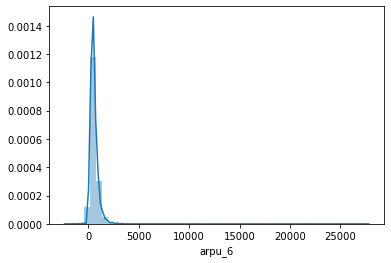

In [52]:
sns.distplot(telecom.arpu_6)

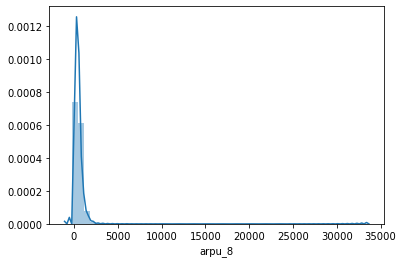

In [53]:
sns.distplot(telecom.arpu_8)

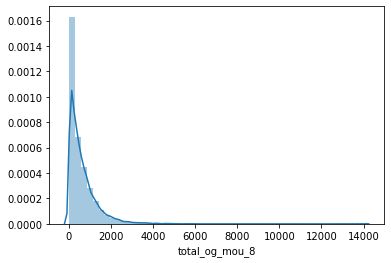

In [54]:
sns.distplot(telecom.total_og_mou_8)

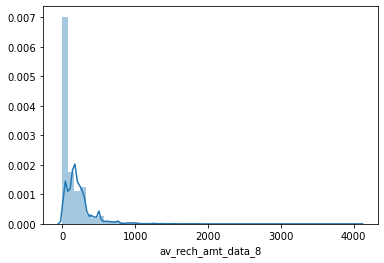

In [55]:
sns.distplot(telecom.av_rech_amt_data_8)

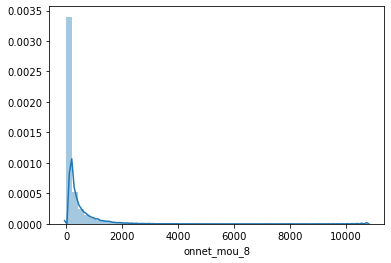

In [56]:
sns.distplot(telecom.onnet_mou_8)

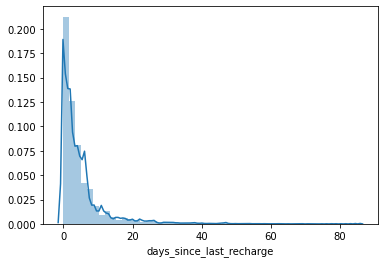

In [57]:
sns.distplot(telecom.days_since_last_recharge)

As we see, most of the variables are skewed towards left

#### Bivariate Analysis

#### night_pck_user_6 v/s Churn  fb_user_6 v/s Churn 

<Figure size 1440x720 with 0 Axes>

Text(0, 0.5, 'Churn Count')

Text(0, 0.5, 'Churn Count')

Text(0, 0.5, 'Churn Count')

<Figure size 1440x720 with 0 Axes>

Text(0, 0.5, 'Churn Count')

Text(0, 0.5, 'Churn Count')

Text(0, 0.5, 'Churn Count')

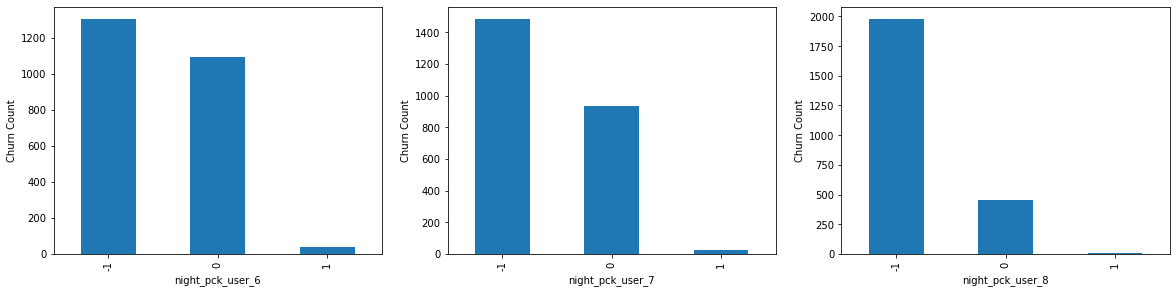

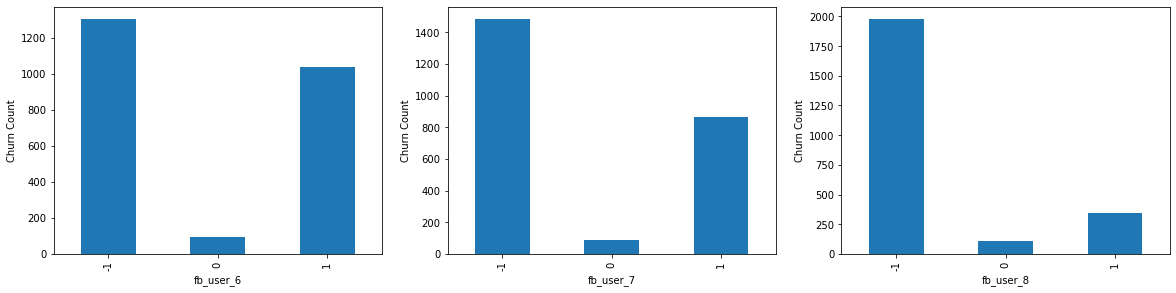

In [58]:
plt.figure(figsize=(20,10))
ax1=plt.subplot(2,3,1)
ax1=telecom.groupby('night_pck_user_6')['churn'].sum().plot.bar(x='night_pck_user_6',y='Churn')
ax1.set_ylabel('Churn Count')

ax2=plt.subplot(2,3,2)
ax2=telecom.groupby('night_pck_user_7')['churn'].sum().plot.bar(x='night_pck_user_7',y='Churn')
ax2.set_ylabel('Churn Count')

ax3 = plt.subplot(2,3,3)
ax3=telecom.groupby('night_pck_user_8')['churn'].sum().plot.bar(x='night_pck_user_8',y='Churn')
ax3.set_ylabel('Churn Count')
               
plt.figure(figsize=(20,10))
ax4=plt.subplot(2,3,4)                          
ax4=telecom.groupby('fb_user_6')['churn'].sum().plot.bar(x='fb_user_6',y='Churn')
ax4.set_ylabel('Churn Count')
                              
ax5=plt.subplot(2,3,5)                           
ax5=telecom.groupby('fb_user_7')['churn'].sum().plot.bar(x='fb_user_7',y='Churn')
ax5.set_ylabel('Churn Count')
               
ax6=plt.subplot(2,3,6)
ax6=telecom.groupby('fb_user_8')['churn'].sum().plot.bar(x='fb_user_8',y='Churn')
ax6.set_ylabel('Churn Count')  

The above plot shows - Customers who are using the night pack are churning less compared to Customers not using the night pack

Buf Facebook user statistics does not give such clear insights. Customers using the facebook are churning more than customers not using churners. But for category'Unknown' (we dont know if user is using FB or not)- churn is highest.

#### aon(age on network) v/s churn

Text(0.5, 1.0, 'Churn v/s Aon')

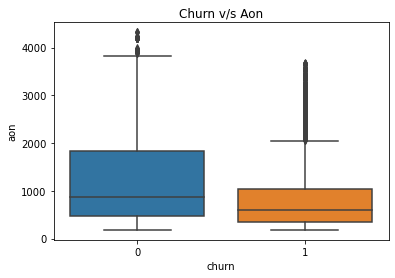

In [59]:

ax=sns.boxplot(telecom.churn, telecom.aon)
ax.set_title("Churn v/s Aon")

The above plot shows that more the number of days the customer is using the operator T network, less are the chances of churn

#### Churn v/s Difference between 8th and 6th/7th month 

<Figure size 1584x1584 with 0 Axes>

Text(0.5, 1.0, 'onnet_mou_diff')

Text(0.5, 1.0, 'offnet_mou_diff')

Text(0.5, 1.0, 'roam_ic_mou_diff')

Text(0.5, 1.0, 'roam_og_mou_diff')

Text(0.5, 1.0, 'loc_ic_mou_diff')

Text(0.5, 1.0, 'loc_og_mou_diff')

Text(0.5, 1.0, 'std_ic_mou_diff')

Text(0.5, 1.0, 'std_og_mou_diff')

Text(0.5, 1.0, 'arpu_diff')

Text(0.5, 1.0, 'total_rech_amt_diff')

Text(0.5, 1.0, 'vol_2g_mb_diff')

Text(0.5, 1.0, 'vol_3g_mb_diff')

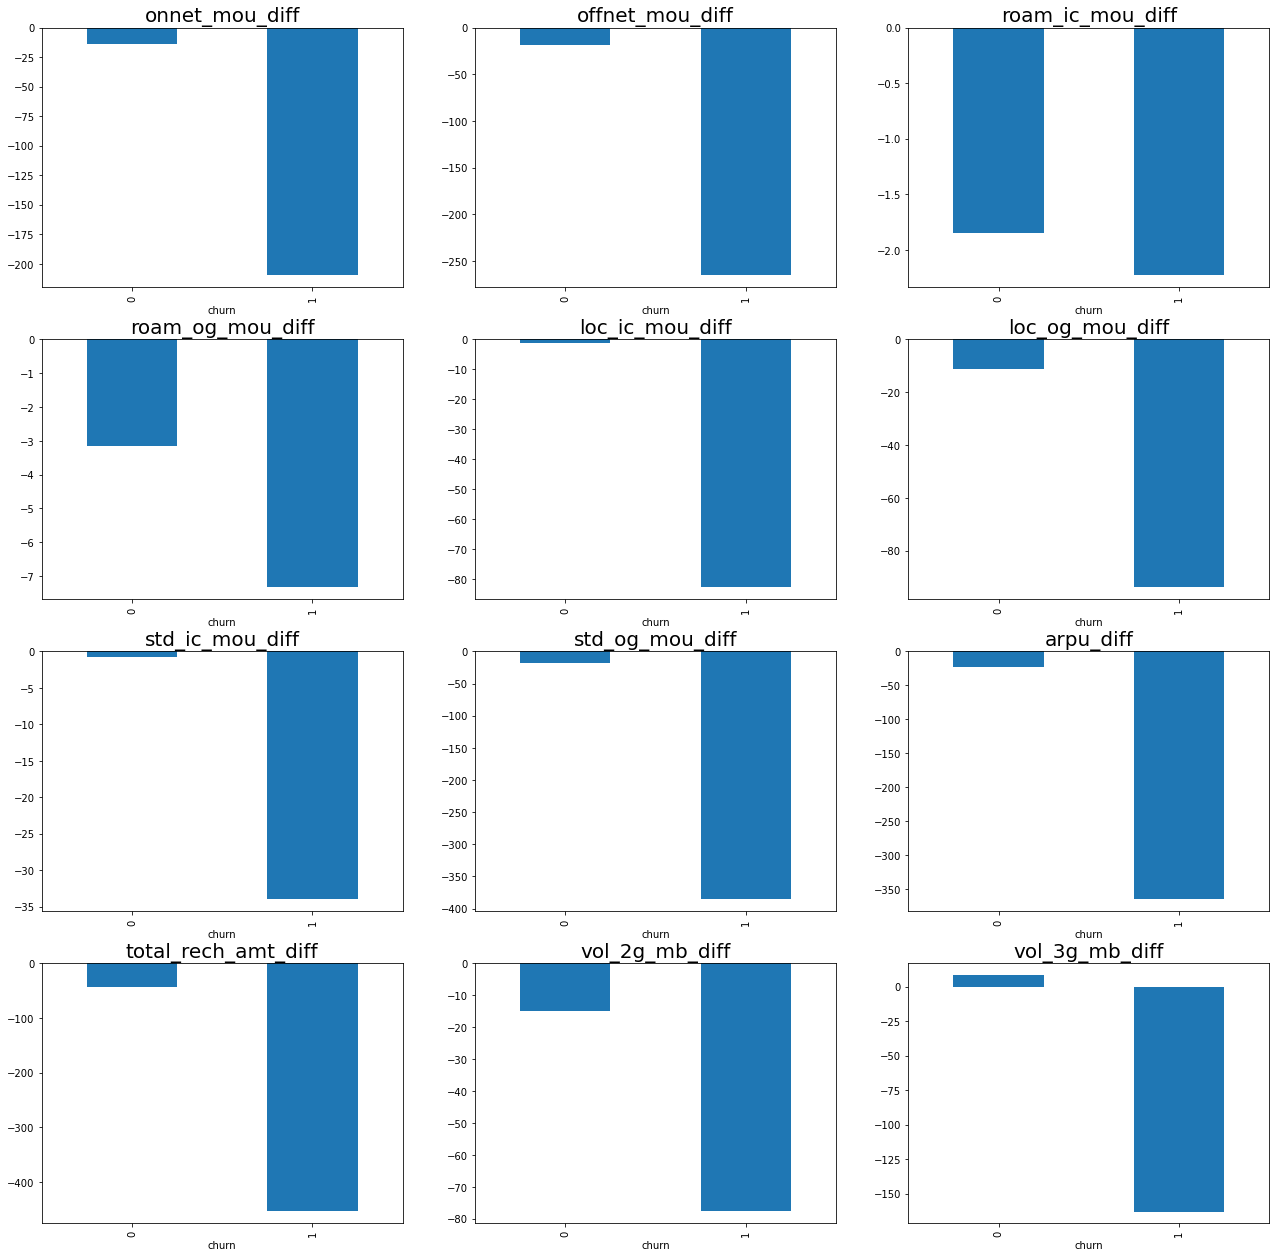

In [60]:

plt.figure(figsize=(22,22))
ax1=plt.subplot(4,3,1)
ax1=telecom.groupby('churn')['onnet_mou_diff'].mean().plot.bar(x='Churn',y='onnet_mou_diff')
ax1.set_title("onnet_mou_diff", fontsize = 20)

ax2 =plt.subplot(4,3,2)
ax2=telecom.groupby('churn')['offnet_mou_diff'].mean().plot.bar(x='Churn',y='offnet_mou_diff')
ax2.set_title("offnet_mou_diff", fontsize = 20)

ax3= plt.subplot(4,3,3)
ax3=telecom.groupby('churn')['roam_ic_mou_diff'].mean().plot.bar(x='Churn',y='roam_ic_mou_diff')
ax3.set_title("roam_ic_mou_diff", fontsize = 20)

ax4= plt.subplot(4,3,4)
ax4=telecom.groupby('churn')['roam_og_mou_diff'].mean().plot.bar(x='Churn',y='roam_og_mou_diff')
ax4.set_title("roam_og_mou_diff", fontsize = 20)

ax5=plt.subplot(4,3,5)
ax5=telecom.groupby('churn')['loc_ic_mou_diff'].mean().plot.bar(x='Churn',y='loc_ic_mou_diff')
ax5.set_title("loc_ic_mou_diff", fontsize = 20)

ax6=plt.subplot(4,3,6)
ax6=telecom.groupby('churn')['loc_og_mou_diff'].mean().plot.bar(x='Churn',y='loc_og_mou_diff')
ax6.set_title("loc_og_mou_diff", fontsize = 20)

ax7=plt.subplot(4,3,7)
ax7=telecom.groupby('churn')['std_ic_mou_diff'].mean().plot.bar(x='Churn',y='std_ic_mou_diff')
ax7.set_title("std_ic_mou_diff", fontsize = 20)

ax8=plt.subplot(4,3,8)
ax8=telecom.groupby('churn')['std_og_mou_diff'].mean().plot.bar(x='Churn',y='std_og_mou_diff')
ax8.set_title("std_og_mou_diff", fontsize = 20)

ax9=plt.subplot(4,3,9)
ax9=telecom.groupby('churn')['arpu_diff'].mean().plot.bar(x='Churn',y='arpu_diff')
ax9.set_title("arpu_diff", fontsize = 20)

ax7=plt.subplot(4,3,10)
ax7=telecom.groupby('churn')['total_rech_amt_diff'].mean().plot.bar(x='Churn',y='total_rech_amt_diff')
ax7.set_title("total_rech_amt_diff", fontsize = 20)

ax8=plt.subplot(4,3,11)
ax8=telecom.groupby('churn')['vol_2g_mb_diff'].mean().plot.bar(x='Churn',y='vol_2g_mb_diff')
ax8.set_title("vol_2g_mb_diff", fontsize = 20)

ax9=plt.subplot(4,3,12)
ax9=telecom.groupby('churn')['vol_3g_mb_diff'].mean().plot.bar(x='Churn',y='vol_3g_mb_diff')
ax9.set_title("vol_3g_mb_diff", fontsize = 20)

plt.show()


As clearly seen in above plots, difference between 8th month & average of 6 & 7 months is quite high for Churners

#### Churn v/s days_since_last_recharge, no of days between 6th and 7th month recharge, no of days between 7th and 8th month recharge, 

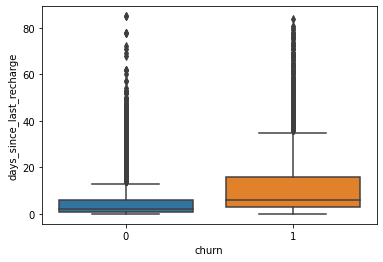

In [61]:
sns.boxplot(telecom.churn, telecom.days_since_last_recharge)

For customer who Churn , the number of days since last recharge is higher compared to those who do not churn as visible from above plot

<Figure size 1080x504 with 0 Axes>

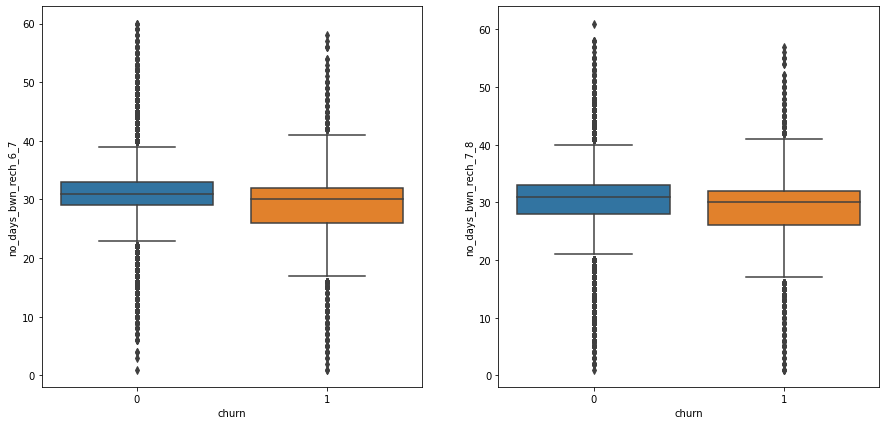

In [62]:
plt.figure(figsize=(15,7))
           
ax1=plt.subplot(1,2,1)
sns.boxplot(telecom.churn, telecom.no_days_bwn_rech_6_7)
ax2=plt.subplot(1,2,2)
sns.boxplot(telecom.churn, telecom.no_days_bwn_rech_7_8)

We dont see much difference in 'number of days between 6th and 7th months recharge' compared to 'number of days between 7th and 8th months recharge'

#### Lets plot Pair  plot for all variables. Because of the large number of variables, we need to plot the graphs in chunks.

In [63]:
telecom.head()

mobile_number  circle_id  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753        109  197.38  214.82  213.80        34.31        32.33   
1     7000701601        109 1069.18 1349.85 3171.48        57.84        54.68   
2     7001524846        109  378.72  492.22  137.36       413.69       351.03   
3     7002124215        109  514.45  597.75  637.76       102.41       132.11   
4     7000887461        109   74.35  193.90  366.97        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00         96.31         91.73          0.00           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        85.14        757.93        896.68        983.39           0.00   
4        33.58         85.41         89.36        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             11.91             11.61              0.00             41.03   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0             40.43              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00              0.00              0.00              0.00   
1             53.23              0.00              0.00              0.00   
2              0.00              0.00              0.00              7.15   
3              1.58              0.00              0.00              0.00   
4              0.00              0.00              0.00             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0         52.94         52.04          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              3.95              3.63   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              

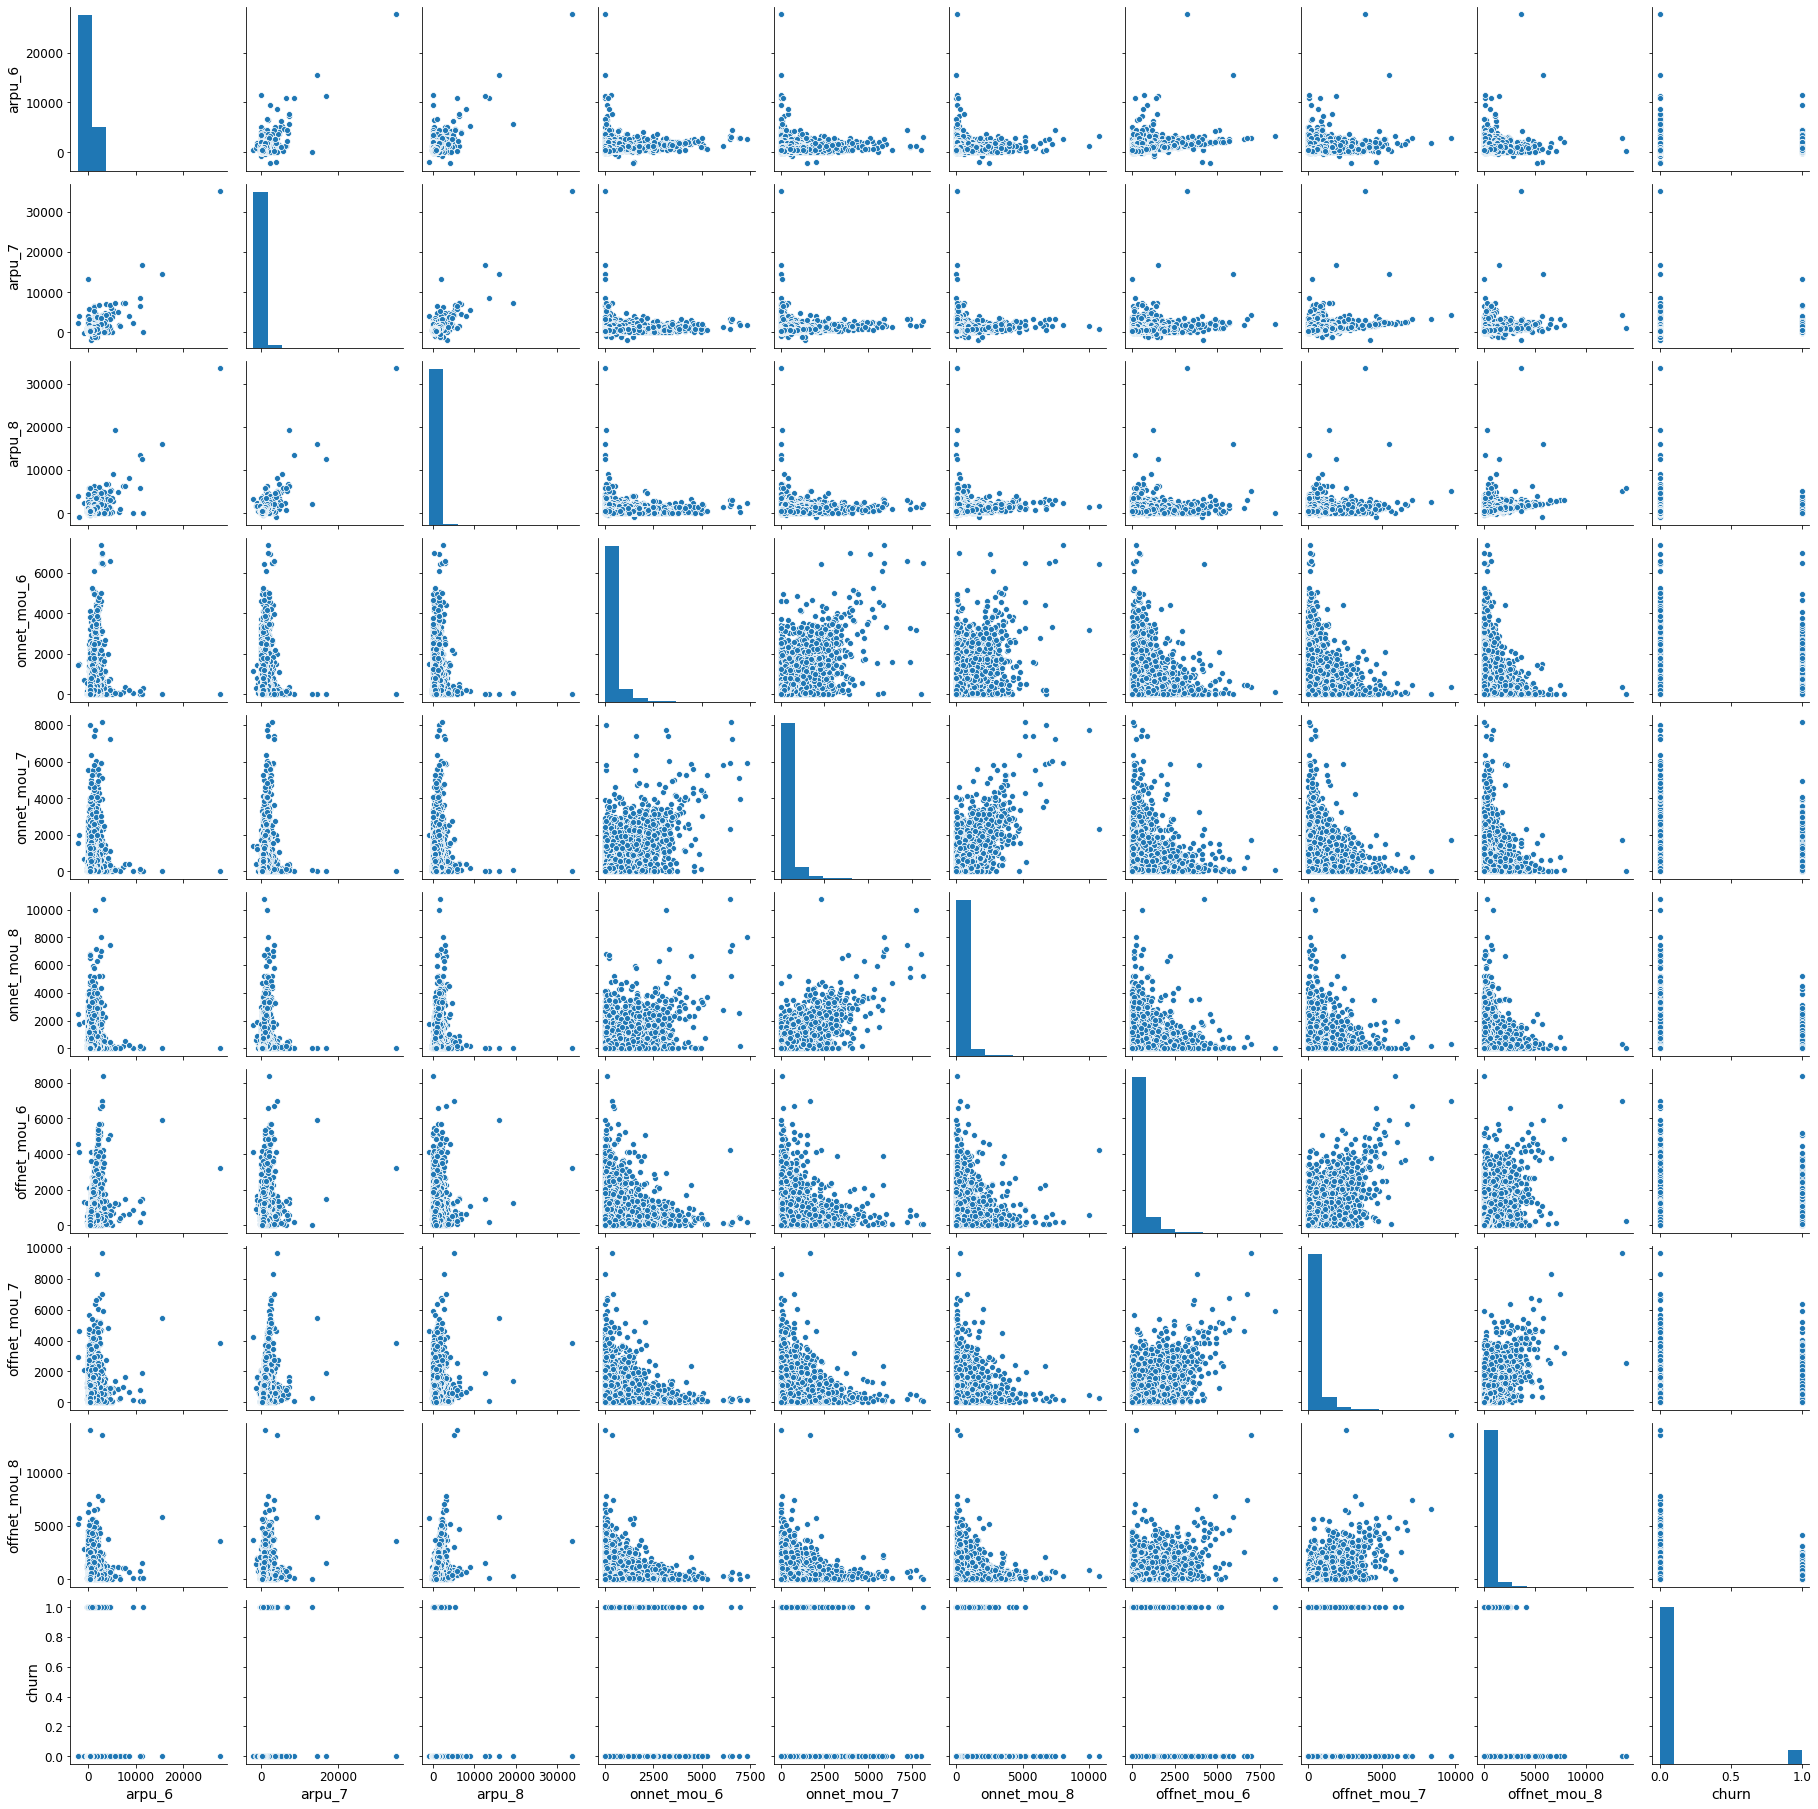

In [64]:
sns.set_context( rc={"axes.labelsize":14, "xtick.labelsize":12, "ytick.labelsize":12})

sns.pairplot(telecom, vars =['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'churn' ])

It is obvious that for Churned customers , the revenu (arpu) and onnet and offnet month usage is less compared to non-churn customers, particularly for 8th Month (August) i.e. in 'Action' phase. 

Also Onnet and Offnet minutes of usage have reverse relationship among themselves. With the increase in Onnet minutes of usage, offnet minutes of usage is decreasing

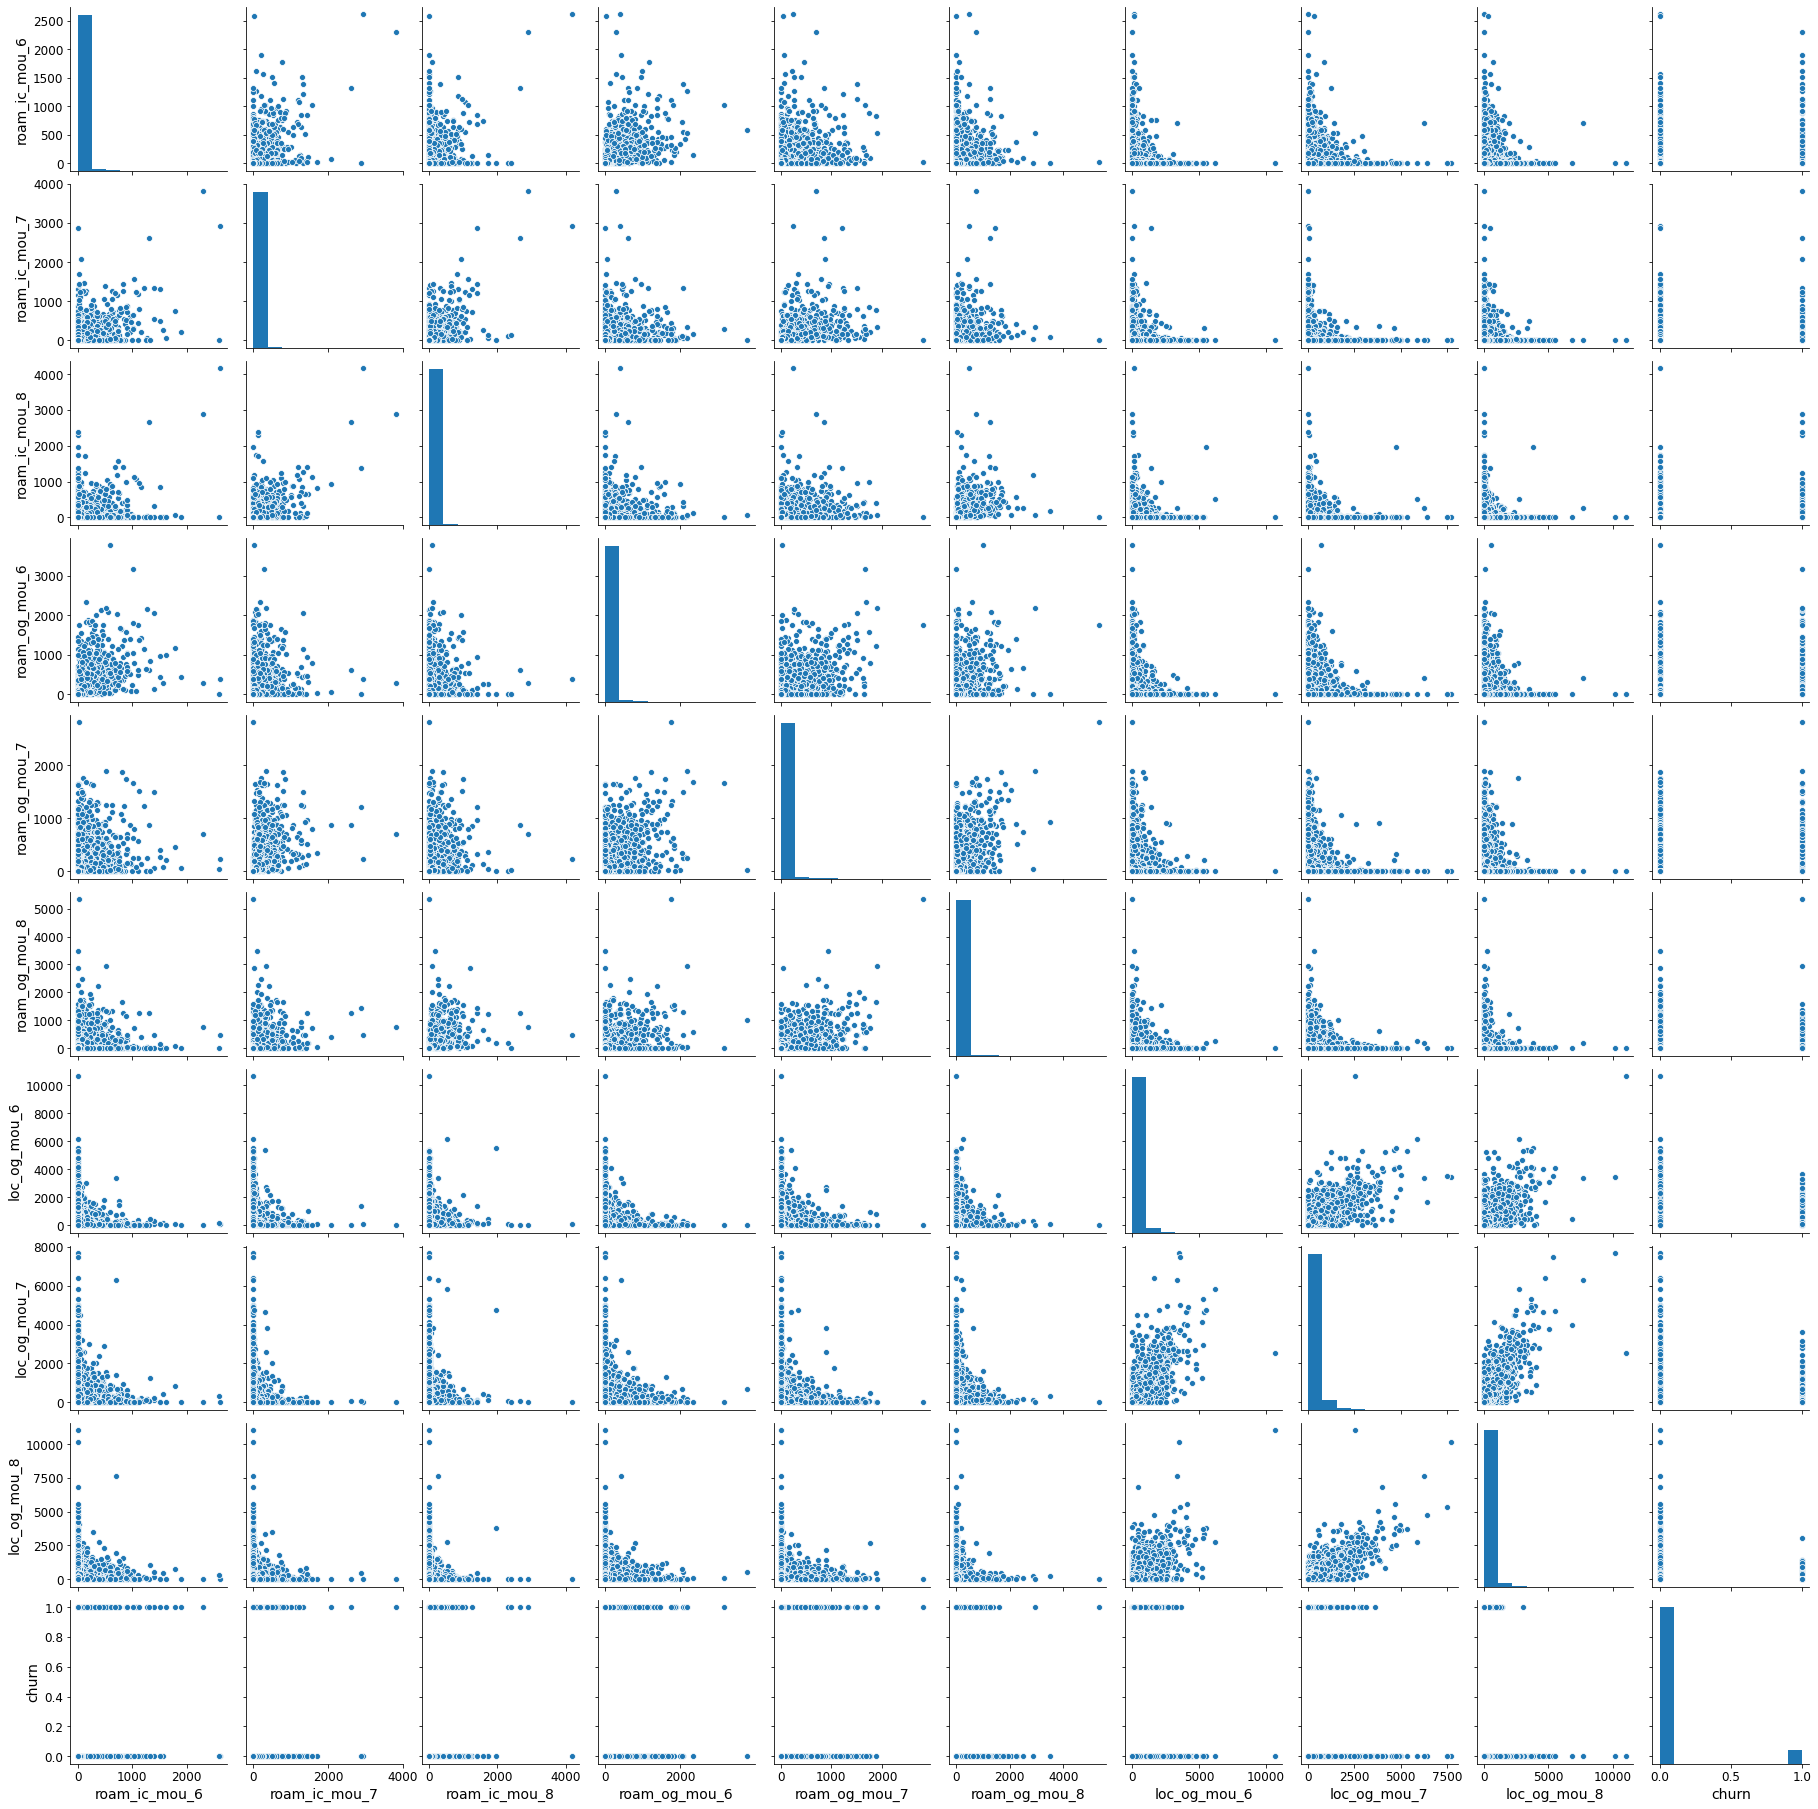

In [65]:
sns.set_context( rc={"axes.labelsize":14, "xtick.labelsize":12, "ytick.labelsize":12})

sns.pairplot(telecom, vars =['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'churn' ])

We can see , Local outgoing minutes of usage and roaming outgoing minutes of usage decrease considerably for 8th month(August) i.e. Action phase

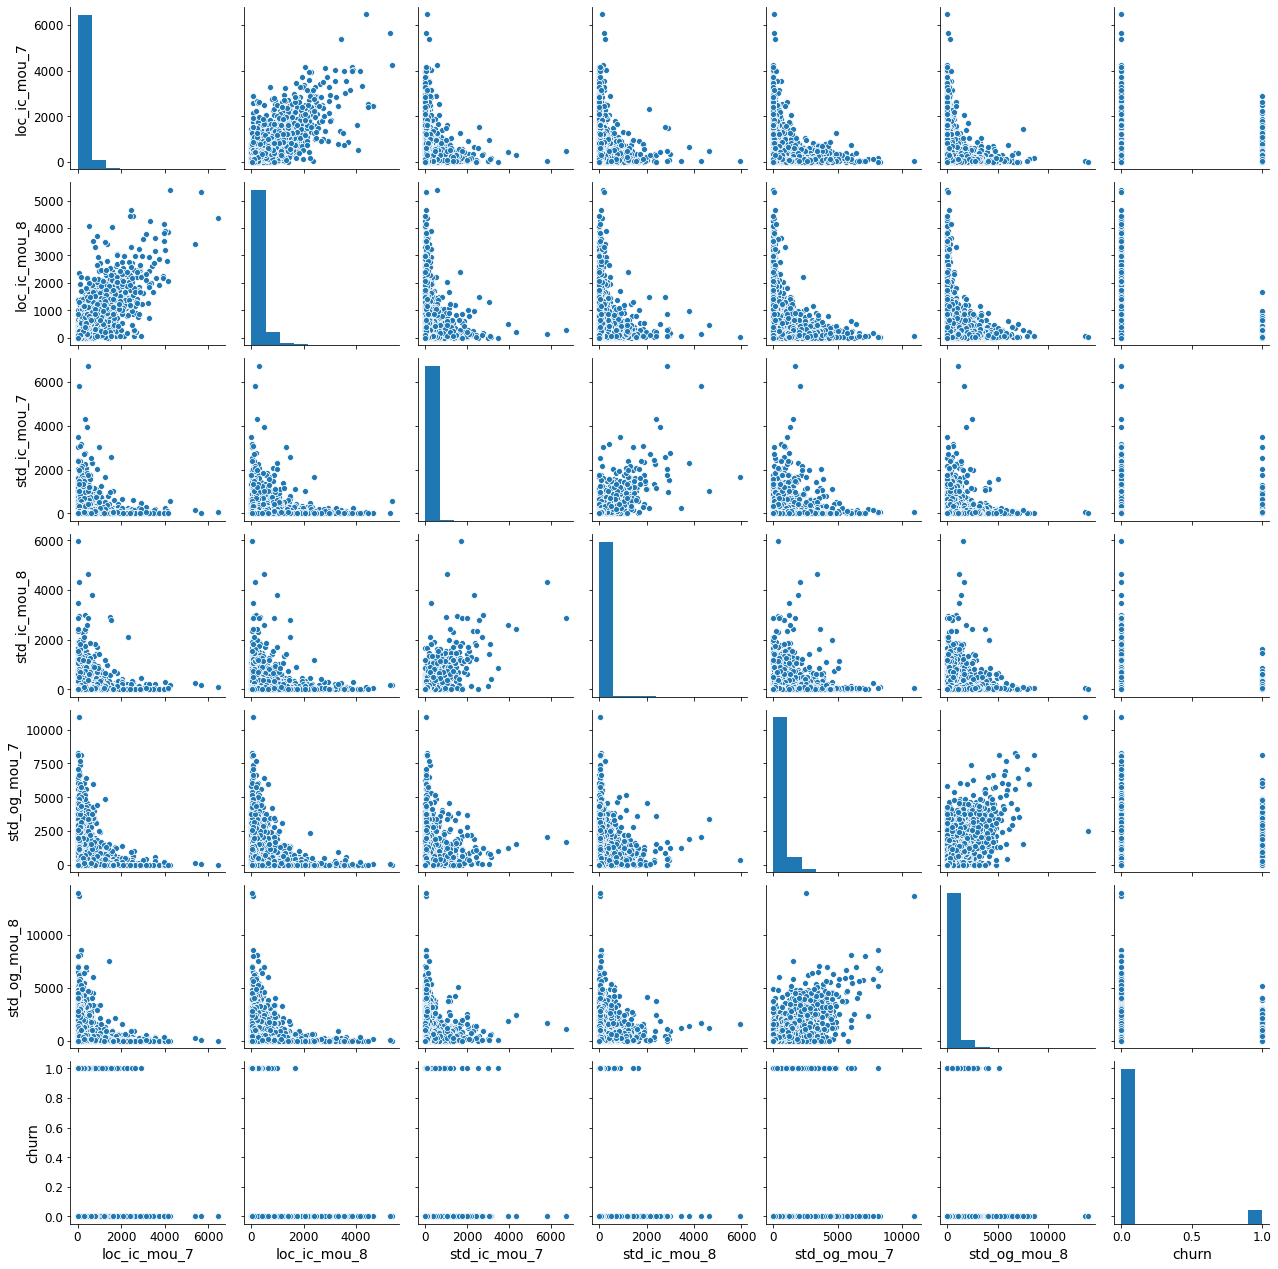

In [66]:
sns.set_context( rc={"axes.labelsize":14, "xtick.labelsize":12, "ytick.labelsize":12})

sns.pairplot(telecom, vars =[ 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_7', 'std_ic_mou_8', 'std_og_mou_7', 'std_og_mou_8','churn' ])

Both Local & Standard - Incoming & Outgoing usage is less in 8th Month(August) for Customers who churn.
Outgoing minutes of usage has inverse relationship with incoming calls.

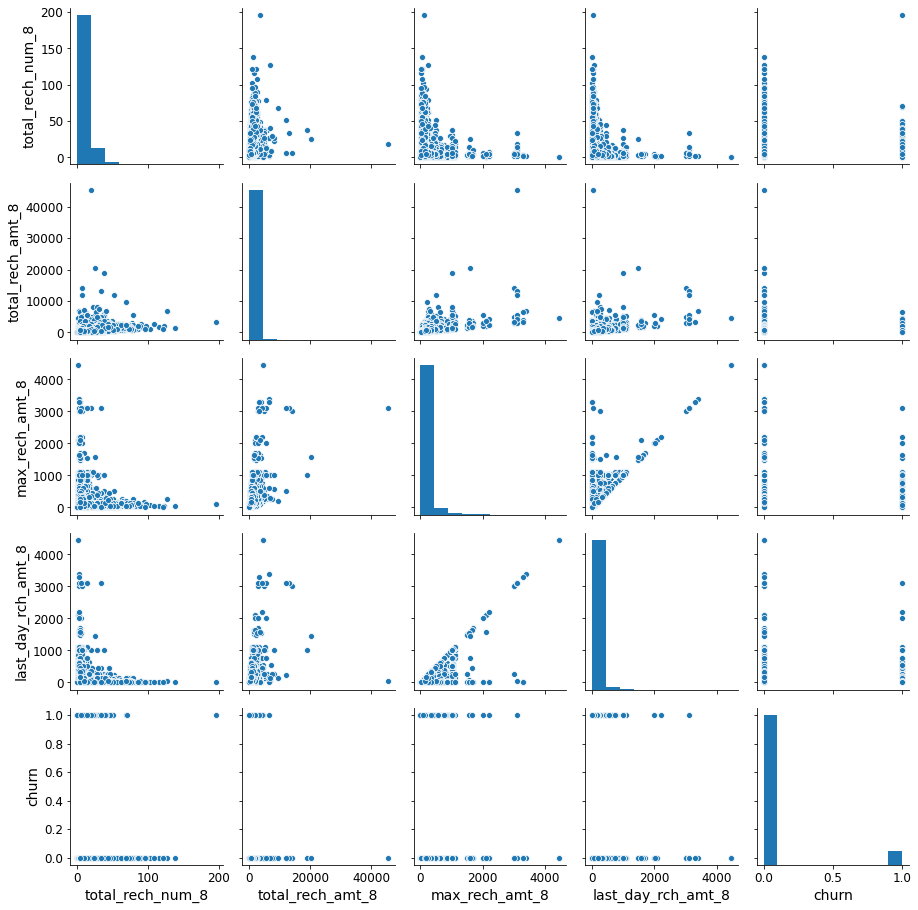

In [67]:
sns.set_context( rc={"axes.labelsize":14, "xtick.labelsize":12, "ytick.labelsize":12})

sns.pairplot(telecom, vars =['total_rech_num_8', 'total_rech_amt_8',  'max_rech_amt_8', "last_day_rch_amt_8", 'churn'])

Total Number of recharge, total recharge amount are significantly less for the churners than non-churners in month of 8 (August)

Also as the total number of recharges increase, Maximum recharge amount decreases. The maximum reacharge amount and last day recharge amount have linear relatioship indicating last day recharge amount coould be the maximum of all recharge amounts

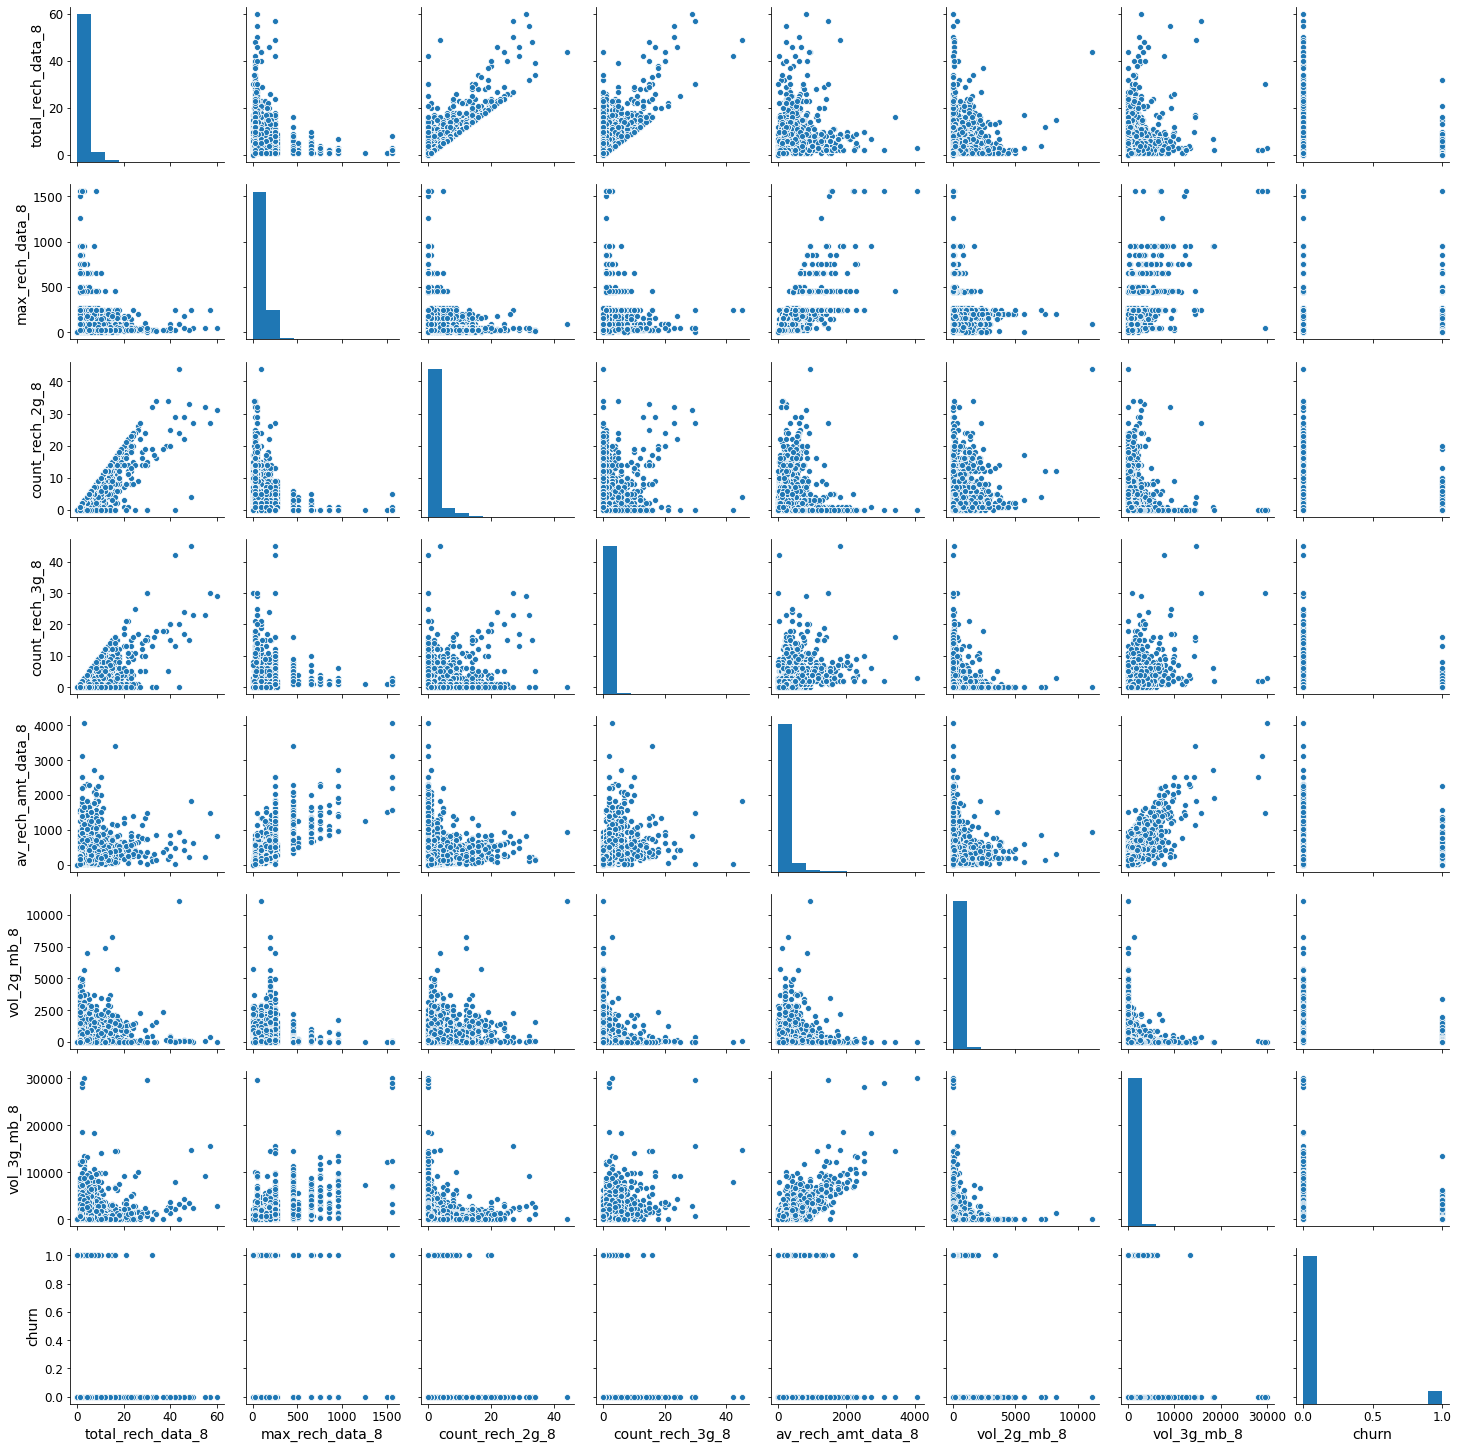

In [68]:
sns.set_context( rc={"axes.labelsize":14, "xtick.labelsize":12, "ytick.labelsize":12})

sns.pairplot(telecom, vars =[ "total_rech_data_8",  "max_rech_data_8",  "count_rech_2g_8", "count_rech_3g_8",  "av_rech_amt_data_8",  "vol_2g_mb_8",  "vol_3g_mb_8", "churn"])

Total data recharges, count of 2g recharge, count of 3g recharge, Average recharge data amount  are less for Churners than non-churners in 8th month(August). Same for Volumne of 2g & 3g internet Uage volume. 

### Dummy Variables Creation

In [69]:
## Check the unique values
telecom.night_pck_user_6.value_counts()
telecom.fb_user_6.value_counts()

 0    16349
-1    13245
 1      407
Name: night_pck_user_6, dtype: int64

 1    15525
-1    13245
 0     1231
Name: fb_user_6, dtype: int64

In [70]:
# Creating a dummy variable for the variables 'night_pck_user_6' , _7 & _8 and dropping the first one.
np_6 = pd.get_dummies(telecom['night_pck_user_6'],prefix='night_pck_user_6',drop_first=True)
np_7 = pd.get_dummies(telecom['night_pck_user_7'],prefix='night_pck_user_7',drop_first=True)
np_8 = pd.get_dummies(telecom['night_pck_user_8'],prefix='night_pck_user_8',drop_first=True)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,np_6, np_7,np_8],axis=1)


# Creating a dummy variable for the variables 'fb_user_6' , _7 & _8 and dropping the first one.
fb_6 = pd.get_dummies(telecom['fb_user_6'],prefix='fb_user_6',drop_first=True)
fb_7 = pd.get_dummies(telecom['fb_user_7'],prefix='fb_user_7',drop_first=True)
fb_8 = pd.get_dummies(telecom['fb_user_8'],prefix='fb_user_8',drop_first=True)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,fb_6, fb_7, fb_8],axis=1)


In [71]:
## Drop the Original variables for which Dummy variables are created
telecom = telecom.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6', 'fb_user_7', 'fb_user_8'], axis=1)

In [72]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 181 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             30001 non-null  int64  
 1   circle_id                 30001 non-null  int64  
 2   arpu_6                    30001 non-null  float64
 3   arpu_7                    30001 non-null  float64
 4   arpu_8                    30001 non-null  float64
 5   onnet_mou_6               30001 non-null  float64
 6   onnet_mou_7               30001 non-null  float64
 7   onnet_mou_8               30001 non-null  float64
 8   offnet_mou_6              30001 non-null  float64
 9   offnet_mou_7              30001 non-null  float64
 10  offnet_mou_8              30001 non-null  float64
 11  roam_ic_mou_6             30001 non-null  float64
 12  roam_ic_mou_7             30001 non-null  float64
 13  roam_ic_mou_8             30001 non-null  float64
 14  roam_

### Train Test Split

In [73]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = telecom.drop(['churn','mobile_number', 'circle_id'],axis=1)

# Putting response variable to y
y = telecom['churn']

y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

We are using stratify = y to preserve the class imbalance in train and test dataset

In [74]:
## Split the dataset into train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7,test_size= 0.3, stratify=y, random_state=100)

In [75]:
## Check the Class labels (0 and 1) % in both train and test datasets

y_train[y_train ==0].count()/len(y_train.index) * 100
y_train[y_train ==1].count()/len(y_train.index) * 100

y_test[y_test ==0].count()/len(y_test.index) * 100
y_test[y_test ==1].count()/len(y_test.index) * 100

91.86190476190477

8.13809523809524

91.86757026997

8.132429730029997

The above stats show that class labels % are preserved in train and test datasets

### PCA 

In [76]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 181 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             30001 non-null  int64  
 1   circle_id                 30001 non-null  int64  
 2   arpu_6                    30001 non-null  float64
 3   arpu_7                    30001 non-null  float64
 4   arpu_8                    30001 non-null  float64
 5   onnet_mou_6               30001 non-null  float64
 6   onnet_mou_7               30001 non-null  float64
 7   onnet_mou_8               30001 non-null  float64
 8   offnet_mou_6              30001 non-null  float64
 9   offnet_mou_7              30001 non-null  float64
 10  offnet_mou_8              30001 non-null  float64
 11  roam_ic_mou_6             30001 non-null  float64
 12  roam_ic_mou_7             30001 non-null  float64
 13  roam_ic_mou_8             30001 non-null  float64
 14  roam_

#### Scaling the data/ Standardization of Features

In [77]:
## Scaling is required before applying PCA or creating any model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
## Scale the Numeric varaiables with StandardScaler which will standardize the features. 
## Scale the training data

telecom_numeric = X_train.select_dtypes(["int64","float64"])
X_train[telecom_numeric.columns] = scaler.fit_transform(X_train[telecom_numeric.columns])

In [79]:
## Scale the Test data

X_test[telecom_numeric.columns] = scaler.transform(X_test[telecom_numeric.columns])

#### PCA On data

In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 24554 to 13081
Data columns (total 178 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   arpu_6                    21000 non-null  float64
 1   arpu_7                    21000 non-null  float64
 2   arpu_8                    21000 non-null  float64
 3   onnet_mou_6               21000 non-null  float64
 4   onnet_mou_7               21000 non-null  float64
 5   onnet_mou_8               21000 non-null  float64
 6   offnet_mou_6              21000 non-null  float64
 7   offnet_mou_7              21000 non-null  float64
 8   offnet_mou_8              21000 non-null  float64
 9   roam_ic_mou_6             21000 non-null  float64
 10  roam_ic_mou_7             21000 non-null  float64
 11  roam_ic_mou_8             21000 non-null  float64
 12  roam_og_mou_6             21000 non-null  float64
 13  roam_og_mou_7             21000 non-null  float64
 14  r

In [81]:
X_train.shape

(21000, 178)

In [82]:
## Import libraries
from sklearn.decomposition import PCA

In [83]:
##Instantiate PCA
pca = PCA(random_state=42)

In [84]:
## Fit the model
pca.fit(X_train)

PCA(random_state=42)

In [85]:
#### Components from the PCA

In [86]:
pca.components_

array([[ 1.36285774e-01,  1.41688284e-01,  1.32649673e-01, ...,
        -6.98427709e-02,  8.46278516e-03, -5.97822239e-02],
       [ 6.22794598e-02,  7.59749259e-02,  1.02192360e-01, ...,
         5.24518676e-02, -6.10776028e-03,  5.84265254e-02],
       [ 9.57912092e-02,  1.45957180e-01,  1.75447073e-01, ...,
         2.19148146e-02,  1.52259544e-03,  3.37395788e-02],
       ...,
       [-0.00000000e+00,  2.67937332e-16, -2.20074537e-16, ...,
        -3.30816641e-03, -9.86320817e-03, -9.86320817e-03],
       [-0.00000000e+00, -2.75859823e-16,  8.90069327e-17, ...,
        -3.86172773e-03, -7.39309864e-03, -7.39309864e-03],
       [-3.32951638e-01, -3.50279537e-01,  7.38135558e-01, ...,
        -2.28549818e-16,  2.90566182e-17, -3.94649591e-17]])

Looking at the explained variance ratio for each component

In [87]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# look at explainded variance of PCA components

print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       9.18
1      16.59
2      22.05
3      26.90
4      31.06
5      34.52
6      37.52
7      40.05
8      42.45
9      44.67
10     46.81
11     48.82
12     50.68
13     52.44
14     54.12
15     55.77
16     57.36
17     58.84
18     60.29
19     61.71
20     63.09
21     64.44
22     65.74
23     66.99
24     68.21
25     69.39
26     70.50
27     71.54
28     72.56
29     73.53
30     74.45
31     75.35
32     76.23
33     77.11
34     77.92
35     78.72
36     79.47
37     80.20
38     80.91
39     81.61
40     82.30
41     82.98
42     83.66
43     84.29
44     84.88
45     85.44
46     85.98
47     86.51
48     87.03
49     87.53
50     88.02
51     88.50
52     88.96
53     89.40
54     89.82
55     90.23
56     90.63
57     91.01
58     91.39
59     91.76
60     92.11
61     92.44
62     92.76
63     93.06
64     93.36
65     93.65
66     93.93
67     94.19
68     94.45
69     94.69
70     94.91
71     95.13
72     95.34
73     95.55
74     95.74
75     95.94
76     96.13

Making a scree plot for the explained variance

Text(0, 0.5, 'Cumulative variance explained')

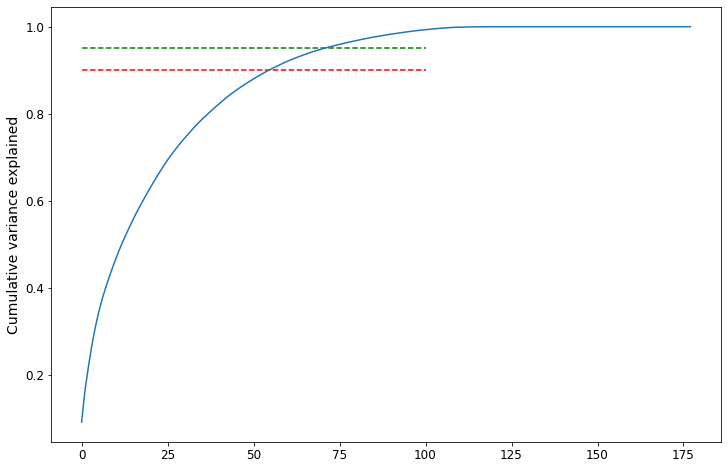

In [88]:
fig = plt.figure(figsize=[12,8])

plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")

plt.hlines(y=0.90, xmax=100, xmin=0, colors="r", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

As we see from the table & plot ~95% variance is explained by 70 components and > 90% variance is explained by 60 components. 
We will go ahead with 60 components

Perform PCA with 60 components

In [89]:
from sklearn.decomposition import IncrementalPCA

In [90]:
pca_final = IncrementalPCA(n_components=60)

In [91]:
X_train_pca = pca_final.fit_transform(X_train)

In [92]:
X_train_pca.shape

(21000, 60)

In [93]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [94]:
corrmat.shape

(60, 60)

Plotting the heatmap of the corr matrix

<Figure size 1080x1080 with 0 Axes>

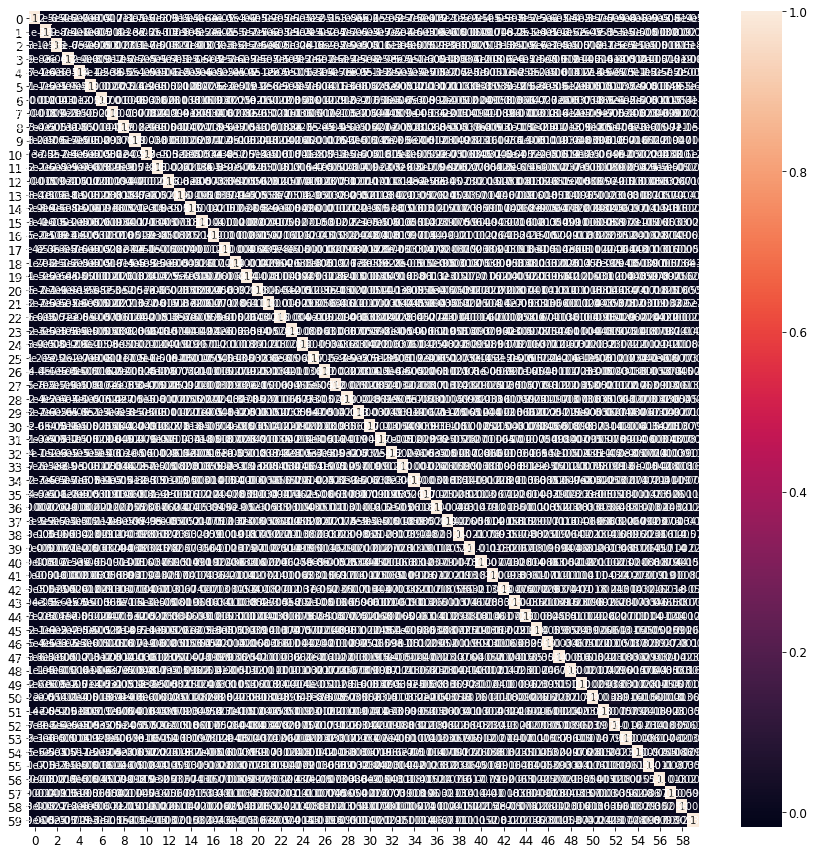

In [95]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

We can see in above heatmap that all the components are highly un-correlated (Color of the entire map is black)

Applying the transformation on the test set

In [96]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 60)

### Applying logistic regression on Principal components (PCA)

In [97]:
# Check Class imbalance
y_train.value_counts()/y_train.shape

0   0.92
1   0.08
Name: churn, dtype: float64

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_recall_fscore_support
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [99]:
## To handle the class imbalance, increasing the weight of Class 1 to 0.9 because its in minority
lr_pca = LogisticRegression(class_weight={0:0.1, 1: 0.9})

In [100]:
## Define the hyper parameters
params = { 'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

In [101]:
# Use StratifiedKFold to preserve the percentage of samples for each class.
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [102]:
## Cross validation
## Run GridSearchCV for Logistic Regression & score -  ROC AUC 
## Get the diferent models for different values of regularization 

model_cv = GridSearchCV(estimator=lr_pca, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [103]:
## Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    4.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 0.1, 1: 0.9}),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [104]:
## Store the model performance results in cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [105]:
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0           0.01          0.00             0.00            0.00    0.10   
1           0.33          0.02             0.01            0.00    0.10   
2           0.01          0.00             0.00            0.00    0.20   
3           0.36          0.04             0.01            0.00    0.20   
4           0.01          0.00             0.00            0.00    0.30   

  param_penalty                       params  split0_test_score  \
0            l1  {'C': 0.1, 'penalty': 'l1'}                nan   
1            l2  {'C': 0.1, 'penalty': 'l2'}               0.88   
2            l1  {'C': 0.2, 'penalty': 'l1'}                nan   
3            l2  {'C': 0.2, 'penalty': 'l2'}               0.88   
4            l1  {'C': 0.3, 'penalty': 'l1'}                nan   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0                nan                nan                nan                nan   
1               0.90               0.88               0.90               0.91   
2                nan                nan                nan                nan   
3               0.90               0.88               0.90               0.91   
4                nan                nan                nan                nan   

   mean_test_score  std_test_score  rank_test_score  
0              nan             nan               15  
1             0.89            0.01                1  
2              nan             nan               20  
3             0.89            0.01                2  
4              nan             nan               19

In [106]:
## Print best hyperparameters
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)

Best AUC:  0.8920881512002093
Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


#### Prediction on Test Dataset

In [107]:

y_pred = model_cv.predict(X_test_pca)

# create onfusion matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)


[[7066 1203]
 [ 149  583]]


In [108]:
TP = confusion_m[1,1] # true positive 
TN = confusion_m[0,0] # true negatives
FP = confusion_m[0,1] # false positives
FN = confusion_m[1,0] # false negatives


In [109]:
# Let's see the sensitivity of our logistic regression model
print ("Sensitivity = ", TP / float(TP+FN))

Sensitivity =  0.796448087431694


In [110]:
# Let us calculate specificity
print ("Specificity = ",TN / float(TN+FP))

Specificity =  0.8545168702382392


In [111]:
# Calculate false positive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14548312976176078


In [112]:
## Predict probability
y_pred_prob = model_cv.predict_proba(X_test_pca)[:, 1]

## Print AUC (Area under curve) score
auc_score = metrics.roc_auc_score( y_test, y_pred_prob )

print( "AUC = ", auc_score)

AUC =  0.8874218805242042


In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8269
           1       0.33      0.80      0.46       732

    accuracy                           0.85      9001
   macro avg       0.65      0.83      0.69      9001
weighted avg       0.93      0.85      0.88      9001



Among all the metrics , we focus most on Recall or Sensitivity because we want False negatives(churn predicted as non-churn) to be very low. We would rather get some extra false positives(false alarms) over saving some false negatives, i.e., we would rather get some non-churn labeled churn over leaving a churn labeled non-churn.

For us Recall is 0.8 which is Good. AUC Score of 0.887 & accuracy of 0.85 is also good. So overall this is a good model.

## XGBoost with PCA

Lets try another model on PCA - XGBoost

In [114]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [115]:
# parameter grid

params = {"learning_rate": [0.2, 0.6],
              "subsample": [0.3, 0.6, 0.9]
             }

In [116]:
# Instantiate XGBoost 
## scale_pos_weight is used for class imbalance (92/8 = ~ 12 where there are 8 rows of churn for total 100 rows)
xgbm = XGBClassifier(max_depth= 4, n_estimators=200, scale_pos_weight = 12)

In [117]:

# create 5 folds. We are using StratifiedKFold to preserve data imbalance in dataset
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# set up GridSearchCV()
model_xgb_pca = GridSearchCV(estimator = xgbm, 
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs= -1,
                        return_train_score=True
                        ) 

## Fit the modelon PCA components
model_xgb_pca.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=4, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=12, subsample=None,
  

In [118]:
## Store the results of GridSearch
cv_results = pd.DataFrame(model_xgb_pca.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          20.61          0.54             0.07            0.00   
1          33.18          1.00             0.07            0.00   
2          42.17          0.90             0.07            0.00   
3          21.98          0.83             0.07            0.00   
4          34.86          0.83             0.07            0.00   

  param_learning_rate param_subsample  \
0                0.20            0.30   
1                0.20            0.60   
2                0.20            0.90   
3                0.60            0.30   
4                0.60            0.60   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}               0.86   
1  {'learning_rate': 0.2, 'subsample': 0.6}               0.87   
2  {'learning_rate': 0.2, 'subsample': 0.9}               0.88   
3  {'learning_rate': 0.6, 'subsample': 0.3}               0.79   
4  {'learning_rate': 0.6, 'subsample': 0.6}               0.85   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0               0.89               0.87               0.87               0.89   
1               0.90               0.88               0.88               0.90   
2               0.90               0.88               0.89               0.91   
3               0.79               0.81               0.81               0.78   
4               0.87               0.84               0.87               0.87   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0             0.88            0.01                3                0.99   
1             0.89            0.01                2                1.00   
2             0.89            0.01                1                1.00   
3             0.80            0.01                6                0.91   
4             0.86            0.01                5                1.00   

   split1_train_score  split2_train_score  split3_train_score  \
0                0.99                0.99                0.99   
1                1.00                1.00                1.00   
2                1.00                1.00                1.00   
3                0.90                0.93                0.92   
4                1.00                1.00                1.00   

   split4_train_score  mean_train_score  std_train_score  
0                0.99              0.99             0.00  
1                1.00              1.00             0.00  
2                1.00              1.00             0.00  
3                0.92              0.92             0.01  
4                1.00              1.00             0.00

In [119]:
# print best hyperparameters
print("Best AUC: ", model_xgb_pca.best_score_)
print("Best hyperparameters: ", model_xgb_pca.best_params_)

Best AUC:  0.8928802617819545
Best hyperparameters:  {'learning_rate': 0.2, 'subsample': 0.9}


#### Prediction on Test Dataset

In [120]:

y_pred = model_xgb_pca.predict(X_test_pca)

# create onfusion matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)


[[7646  623]
 [ 249  483]]


In [121]:
TP = confusion_m[1,1] # true positive 
TN = confusion_m[0,0] # true negatives
FP = confusion_m[0,1] # false positives
FN = confusion_m[1,0] # false negatives


In [122]:
# Let's see the sensitivity of our logistic regression model
print ("Sensitivity = ", TP / float(TP+FN))

Sensitivity =  0.6598360655737705


In [123]:
# Let us calculate specificity
print ("Specificity = ",TN / float(TN+FP))

Specificity =  0.9246583625589552


In [124]:
# Calculate false positive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07534163744104487


In [125]:
## Predict probability
y_pred_prob = model_xgb_pca.predict_proba(X_test_pca)[:, 1]

## Print AUC (Area under curve) score
auc_score = metrics.roc_auc_score( y_test, y_pred_prob )

print ("AUC = ", auc_score)

AUC =  0.8937865898506966


In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      8269
           1       0.44      0.66      0.53       732

    accuracy                           0.90      9001
   macro avg       0.70      0.79      0.74      9001
weighted avg       0.93      0.90      0.91      9001



Among all the metrics , we focus most on Recall or Sensitivity because we want False negatives(churn predicted as non-churn) to be very low. We would rather get some extra false positives(false alarms) over saving some false negatives, i.e., we would rather get some non-churn labeled churn over leaving a churn labeled non-churn.

For this XGB model,  Recall is 0.66 which is low compared to the earlier model of LogistricRegression with PCA (0.796) . AUC Score of 0.893 & accuracy of 0.9 which is good. But since Recall/Sensitivity is low, the model is not good for our business requirements.

## Random Forest (Without PCA)

In [127]:
from sklearn.ensemble import RandomForestClassifier


In [128]:
max_features = int(round(np.sqrt(X_train.shape[1])))
max_features

13

Parameters to consider:
 - n_estimators: The number of trees in the forest.
 - max_features : The number of features to consider when looking for the best split
 - max_depth : The maximum depth of the tree. 
 - min_samples_split :The minimum number of samples required to split an internal node
 - min_samples_leaf:The minimum number of samples required to be at a leaf node 

Without having any reference, if we use GridSearchCV (for RandomForest) with a long range of hyperparameters values, it takes significantly long to get the output. So we will take each of the 5 above hyperparamaters to find optimal range of values for these hyperparameters

### Tuning max_depth

In [129]:

# StratifiedKFold is used to preserve the % of samples in each class (required because of class impbalance)
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# parameters to build the model on
params = {'max_depth': range(2, 20, 5)}

# Create a based model. Class weight is used to handle class imbalance.
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# create gridsearch object
grid_search_model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='accuracy',return_train_score=True, n_jobs= -1 , verbose=1)


# fit tree on training data

grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [130]:
# scores of GridSearch CV
scores = grid_search_model.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           2.47          1.10             2.58            0.24   
1           5.89          0.07             2.27            2.54   
2          13.06          0.41             0.77            0.45   
3           8.92          2.35             0.59            0.55   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}               0.91               0.92   
1               7   {'max_depth': 7}               0.92               0.93   
2              12  {'max_depth': 12}               0.94               0.95   
3              17  {'max_depth': 17}               0.94               0.95   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0               0.90               0.91               0.91             0.91   
1               0.92               0.93               0.92             0.93   
2               0.94               0.94               0.94             0.94   
3               0.94               0.95               0.95             0.94   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0            0.01                4                0.92                0.92   
1            0.00                3                0.94                0.94   
2            0.00                2                0.98                0.98   
3            0.00                1                0.99                0.99   

   split2_train_score  split3_train_score  split4_train_score  \
0                0.91                0.91                0.91   
1                0.94                0.94                0.94   
2                0.98                0.98                0.98   
3                0.99                0.99                0.99   

   mean_train_score  std_train_score  
0              0.91             0.00  
1              0.94             0.00  
2              0.98             0.00  
3              0.99             0.00

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

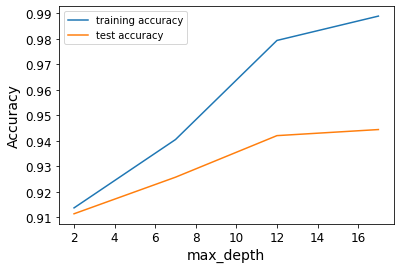

In [131]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
scores["mean_train_score"], 
label="training accuracy")

plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score remains same. The ensemble tries to overfit as we increase the max_depth.


### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [132]:

# StratifiedKFold is used to preserve the % of samples in each class (required because of class impbalance)
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# parameters to build the model on
params = {'n_estimators': range(100, 1000, 400)}


# Create a based model. Class weight is used to handle class imbalance 
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9},max_depth= 6,  n_jobs = -1)

# create gridsearch object
grid_search_model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='accuracy',return_train_score=True, n_jobs= -1 , verbose=1)


# fit tree on training data

grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              max_depth=6, n_jobs=-1),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1000, 400)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [133]:
# scores of GridSearch CV
scores = grid_search_model.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           5.20          1.21             2.99            0.32   
1          32.29          2.48             3.89            1.13   
2          49.93          8.59             1.57            0.98   

  param_n_estimators                 params  split0_test_score  \
0                100  {'n_estimators': 100}               0.92   
1                500  {'n_estimators': 500}               0.92   
2                900  {'n_estimators': 900}               0.92   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0               0.93               0.92               0.92               0.92   
1               0.93               0.92               0.92               0.92   
2               0.93               0.92               0.92               0.92   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0             0.92            0.01                3                0.93   
1             0.92            0.00                2                0.93   
2             0.92            0.00                1                0.93   

   split1_train_score  split2_train_score  split3_train_score  \
0                0.93                0.93                0.93   
1                0.93                0.93                0.93   
2                0.93                0.93                0.93   

   split4_train_score  mean_train_score  std_train_score  
0                0.93              0.93             0.00  
1                0.93              0.93             0.00  
2                0.93              0.93             0.00

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'n_estimators')

Text(0, 0.5, 'Accuracy')

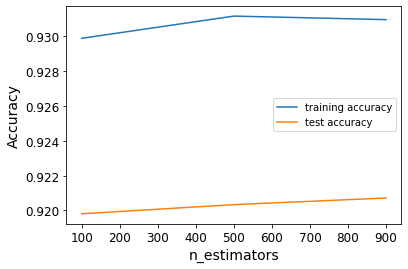

In [134]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


We can see accuracy is increasing to certain point and then its almost constant

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum number of features considered for splitting at a node.

In [135]:
# StratifiedKFold is used to preserve the % of samples in each class (required because of class impbalance)
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# parameters to build the model on
params = {'max_features': [4, 8, 13, 20, 24]}

# Create a based model. Class weight is used to handle class imbalance 
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9},max_depth=6,  n_jobs = -1)

# create gridsearch object
grid_search_model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='accuracy',return_train_score=True, n_jobs= -1 , verbose=1)


# fit tree on training data

grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   29.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              max_depth=6, n_jobs=-1),
             n_jobs=-1, param_grid={'max_features': [4, 8, 13, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [136]:
# scores of GridSearch CV
scores = grid_search_model.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           2.13          0.84             1.76            0.62   
1           4.10          0.48             1.57            1.50   
2           7.20          0.13             0.61            0.07   
3           9.42          1.07             2.19            0.95   
4           9.18          3.24             0.43            0.30   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}               0.91   
1                  8   {'max_features': 8}               0.91   
2                 13  {'max_features': 13}               0.92   
3                 20  {'max_features': 20}               0.92   
4                 24  {'max_features': 24}               0.92   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0               0.93               0.91               0.91               0.91   
1               0.92               0.92               0.92               0.92   
2               0.93               0.92               0.92               0.92   
3               0.93               0.92               0.92               0.92   
4               0.93               0.92               0.92               0.92   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0             0.92            0.01                5                0.93   
1             0.92            0.00                4                0.93   
2             0.92            0.00                3                0.93   
3             0.92            0.01                2                0.93   
4             0.92            0.00                1                0.93   

   split1_train_score  split2_train_score  split3_train_score  \
0                0.92                0.93                0.92   
1                0.93                0.93                0.92   
2                0.93                0.93                0.93   
3                0.93                0.93                0.93   
4                0.94                0.93                0.93   

   split4_train_score  mean_train_score  std_train_score  
0                0.92              0.92             0.00  
1                0.93              0.93             0.00  
2                0.93              0.93             0.00  
3                0.93              0.93             0.00  
4                0.93              0.93             0.00

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'max_features')

Text(0, 0.5, 'Accuracy')

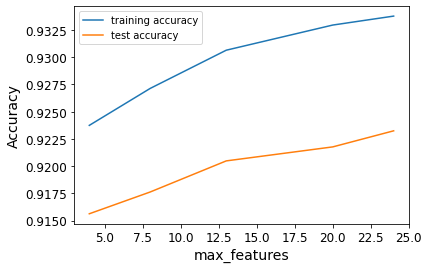

In [137]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Both Training and Test scores seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:

In [138]:
# StratifiedKFold is used to preserve the % of samples in each class (required because of class impbalance)
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# parameters to build the model on
params =  {'min_samples_leaf': range(100, 500, 50)}

# Create a based model. Class weight is used to handle class imbalance 
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9},max_depth=6,  n_jobs = -1)

# create gridsearch object
grid_search_model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='accuracy',return_train_score=True, n_jobs= -1 , verbose=1)


# fit tree on training data

grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   37.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              max_depth=6, n_jobs=-1),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 500, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [139]:
# scores of GridSearch CV
scores = grid_search_model.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           5.24          1.70             2.53            1.56   
1           7.26          0.73             0.53            0.69   
2           7.20          0.14             0.30            0.10   
3           5.79          1.32             1.46            1.20   
4           5.68          1.62             1.43            1.56   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}               0.91   
1                    150  {'min_samples_leaf': 150}               0.90   
2                    200  {'min_samples_leaf': 200}               0.90   
3                    250  {'min_samples_leaf': 250}               0.90   
4                    300  {'min_samples_leaf': 300}               0.90   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0               0.91               0.90               0.91               0.91   
1               0.91               0.90               0.90               0.90   
2               0.91               0.90               0.90               0.90   
3               0.91               0.90               0.90               0.90   
4               0.91               0.90               0.90               0.90   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0             0.91            0.00                1                0.91   
1             0.90            0.00                2                0.91   
2             0.90            0.00                4                0.91   
3             0.90            0.00                3                0.91   
4             0.90            0.00                5                0.90   

   split1_train_score  split2_train_score  split3_train_score  \
0                0.91                0.91                0.91   
1                0.91                0.91                0.90   
2                0.91                0.91                0.90   
3                0.91                0.91                0.90   
4                0.90                0.90                0.90   

   split4_train_score  mean_train_score  std_train_score  
0                0.91              0.91             0.00  
1                0.91              0.91             0.00  
2                0.90              0.91             0.00  
3                0.90              0.90             0.00  
4                0.91              0.90             0.00

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_leaf')

Text(0, 0.5, 'Accuracy')

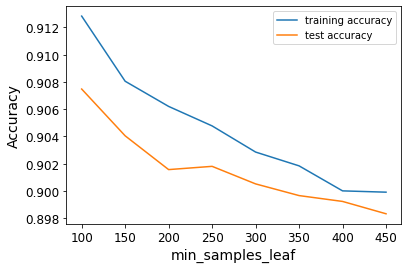

In [140]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that as the min_samples_leaf is increased, accruacy decreases. But also  the model starts of overfit as we decrease the value of min_samples_leaf. 

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [141]:
# StratifiedKFold is used to preserve the % of samples in each class (required because of class impbalance)
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# parameters to build the model on
params =  {'min_samples_split': range(100, 500, 50)}

# Create a based model. Class weight is used to handle class imbalance 
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9},max_depth=6,  n_jobs = -1)

# create gridsearch object
grid_search_model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='accuracy',return_train_score=True, n_jobs= -1 , verbose=1)


# fit tree on training data

grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   42.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              max_depth=6, n_jobs=-1),
             n_jobs=-1, param_grid={'min_samples_split': range(100, 500, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [142]:
# scores of GridSearch CV
scores = grid_search_model.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           6.84          1.64             1.44            1.57   
1           6.78          1.61             1.49            1.67   
2           7.47          1.50             0.90            1.47   
3           6.10          1.60             2.11            1.58   
4           7.27          1.44             0.91            1.41   

  param_min_samples_split                      params  split0_test_score  \
0                     100  {'min_samples_split': 100}               0.91   
1                     150  {'min_samples_split': 150}               0.91   
2                     200  {'min_samples_split': 200}               0.91   
3                     250  {'min_samples_split': 250}               0.91   
4                     300  {'min_samples_split': 300}               0.91   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0               0.93               0.91               0.92               0.91   
1               0.92               0.91               0.91               0.91   
2               0.92               0.91               0.91               0.91   
3               0.92               0.91               0.91               0.91   
4               0.92               0.91               0.91               0.91   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0             0.92            0.00                1                0.93   
1             0.91            0.00                2                0.92   
2             0.91            0.01                3                0.92   
3             0.91            0.00                4                0.92   
4             0.91            0.00                5                0.92   

   split1_train_score  split2_train_score  split3_train_score  \
0                0.92                0.92                0.92   
1                0.92                0.92                0.92   
2                0.92                0.92                0.92   
3                0.92                0.92                0.91   
4                0.92                0.92                0.91   

   split4_train_score  mean_train_score  std_train_score  
0                0.92              0.92             0.00  
1                0.92              0.92             0.00  
2                0.92              0.92             0.00  
3                0.92              0.92             0.00  
4                0.92              0.92             0.00

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'min_samples_split')

Text(0, 0.5, 'Accuracy')

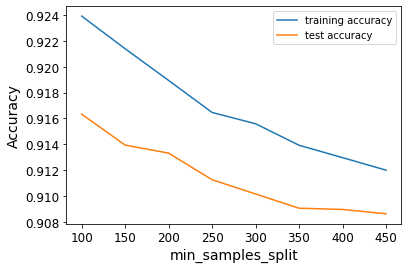

In [143]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As the min_samples_split increases, Accuracy decreases.

### Grid Search to Find Optimal Hyperparameters

Based on the optimal values found separately above, we will restrict the values of hyperparameters and use GridSearchCV to get the final optimal values

In [144]:
# Create the parameter grid based on the results of above parameter tuning.

params = {
    'max_depth': [6, 8],
    'min_samples_leaf': range(300, 350, 400),
    'min_samples_split': range(300, 350, 400),
    'n_estimators': [100, 500], 
    'max_features': [7, 8,9]
}

# StratifiedKFold is used to preserve the % of samples in each class (required because of class impbalance)
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# Create a based model. Class weight is used to handle class imbalance 
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# create gridsearch object
grid_search_model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)


In [145]:
# Fit the grid search to the data
grid_search_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8], 'max_features': [7, 8, 9],
                         'min_samples_leaf': range(300, 350, 400),
                         'min_samples_split': range(300, 350, 400),
                         'n_estimators': [100, 500]},
             scoring='roc_auc', verbose=1)

In [146]:
# Print best hyperparameters
print("Best AUC: ", grid_search_model.best_score_)
print("Best hyperparameters: ", grid_search_model.best_params_)

Best AUC:  0.9238707989453727
Best hyperparameters:  {'max_depth': 8, 'max_features': 9, 'min_samples_leaf': 300, 'min_samples_split': 300, 'n_estimators': 500}


### Fitting the final model with the best parameters obtained from grid search

In [147]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=300, 
                             min_samples_split=300,
                             max_features=9,
                             n_estimators=500,
                             class_weight={0:0.1, 1: 0.9},
                             oob_score=True, 
                             random_state=42,
                             n_jobs = -1,
                             verbose = 1)

In [148]:
# fit
rf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=8,
                       max_features=9, min_samples_leaf=300,
                       min_samples_split=300, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=1)

In [149]:
# OOB score on train data
rf.oob_score_

0.9012857142857142

### Prediction on Test Data

In [150]:
# Prediction on test dataset
y_pred = rf.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


In [151]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [152]:
# OOB score on test data
print('Score: ', rf.score(X_test, y_test))

Score:  0.8970114431729808


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


In [153]:
print(confusion_matrix(y_test,y_pred))

[[7521  748]
 [ 179  553]]


In [154]:
## Predict probability
y_pred_prob = rf.predict_proba(X_test)[:, 1]

## Print AUC (Area under curve) score
auc_score = metrics.roc_auc_score( y_test, y_pred_prob )

print ("AUC score: " ,auc_score)

AUC score:  0.9198745462511572


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8269
           1       0.43      0.76      0.54       732

    accuracy                           0.90      9001
   macro avg       0.70      0.83      0.74      9001
weighted avg       0.93      0.90      0.91      9001



Recall score (0.76) is good though its not as good as for Logistric Regression model with PCA. Accuracy is 0.9 and AUC score is 0.919. Test OOB score(0.89) is as high as of train OOB score (0.90) which means model is not overfitted

### Topmost features selection by Feature Importance

We also need to identify the most important predictor attributes which help the business understand indicators of churn

In [157]:
# Get all the features (independent variables) from the dataframe
features = X_train.columns

# Find out the feature_importance from the final RandomForest model
feature_importance = rf.feature_importances_

# create dataframe with feature names and their importance %
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': feature_importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# Sort features in descending order of their importance 
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)

## Check if sum of importance is 100
print("Sum of importance=", feature_importance.importance_percentage.sum())

## Print the features in decreasing order of their importance
feature_importance


Sum of importance= 100.00000000000001


variables  importance_percentage
0              total_ic_mou_8                   7.31
1              total_og_mou_8                   5.19
2                      arpu_8                   4.81
3          last_day_rch_amt_8                   4.54
4         total_rech_amt_diff                   4.43
5                loc_ic_mou_8                   4.09
6            total_rech_amt_8                   3.94
7                   arpu_diff                   3.85
8            loc_ic_t2m_mou_8                   3.64
9              max_rech_amt_8                   3.47
10               loc_og_mou_8                   3.17
11         av_rech_amt_data_8                   2.80
12           loc_og_t2m_mou_8                   2.77
13           loc_ic_t2t_mou_8                   2.44
14          total_og_mou_diff                   2.20
15           loc_ic_t2f_mou_8                   2.11
16   days_since_last_recharge                   1.87
17           loc_og_t2t_mou_8                   1.85
18          total_ic_mou_diff                   1.74
19                vol_2g_mb_8                   1.63
20                fb_user_8_1                   1.58
21              roam_og_mou_8                   1.58
22          total_rech_data_8                   1.51
23               std_ic_mou_8                   1.50
24        total_rech_num_diff                   1.45
25            std_og_mou_diff                   1.37
26              roam_ic_mou_8                   1.30
27            max_rech_data_8                   1.04
28           loc_og_t2f_mou_8                   0.86
29           total_rech_num_8                   0.86
30          max_rech_amt_diff                   0.85
31       no_days_bwn_rech_7_8                   0.80
32               spl_og_mou_8                   0.75
33           roam_og_mou_diff                   0.75
34            offnet_mou_diff                   0.75
35           std_ic_t2m_mou_8                   0.73
36                onnet_mou_8                   0.70
37         night_pck_user_8_0                   0.64
38               offnet_mou_8                   0.63
39           roam_ic_mou_diff                   0.61
40             onnet_mou_diff                   0.59
41            loc_ic_mou_diff                   0.53
42           std_og_t2m_mou_8                   0.45
43                vol_3g_mb_8                   0.45
44            count_rech_2g_8                   0.42
45               loc_ic_mou_7                   0.41
46      av_rech_amt_data_diff                   0.38
47            std_ic_mou_diff                   0.37
48             vol_2g_mb_diff                   0.34
49             total_ic_mou_7                   0.33
50           std_ic_t2t_mou_8                   0.33
51               std_og_mou_8                   0.31
52            loc_og_mou_diff                   0.28
53             total_og_mou_7                   0.27
54             total_ic_mou_6                   0.27
55           loc_ic_t2f_mou_7                   0.20
56           std_og_t2t_mou_8                   0.19
57           loc_og_t2f_mou_7                   0.19
58             total_og_mou_6                   0.19
59           loc_ic_t2m_mou_7                   0.18
60           loc_og_t2m_mou_7                   0.18
61               loc_og_mou_7                   0.18
62                 aug_vbc_3g                   0.17
63               std_og_mou_7                   0.17
64               std_og_mou_6                   0.16
65         max_rech_data_diff                   0.15
66            spl_og_mou_diff                   0.15
67               loc_ic_mou_6                   0.15
68            max_rech_data_7                   0.13
69           loc_og_t2m_mou_6                   0.12
70                vol_2g_mb_7                   0.12
71            count_rech_3g_8                   0.12
72                     arpu_7                   0.10
73               loc_og_mou_6                   0.10
74           loc_ic_t2f_mou_6                

### Select topmost 30 features

In [158]:
## Select top 30 features by feature importance

top_features = feature_importance.variables[0:30]

In [159]:
top_features

0               total_ic_mou_8
1               total_og_mou_8
2                       arpu_8
3           last_day_rch_amt_8
4          total_rech_amt_diff
5                 loc_ic_mou_8
6             total_rech_amt_8
7                    arpu_diff
8             loc_ic_t2m_mou_8
9               max_rech_amt_8
10                loc_og_mou_8
11          av_rech_amt_data_8
12            loc_og_t2m_mou_8
13            loc_ic_t2t_mou_8
14           total_og_mou_diff
15            loc_ic_t2f_mou_8
16    days_since_last_recharge
17            loc_og_t2t_mou_8
18           total_ic_mou_diff
19                 vol_2g_mb_8
20                 fb_user_8_1
21               roam_og_mou_8
22           total_rech_data_8
23                std_ic_mou_8
24         total_rech_num_diff
25             std_og_mou_diff
26               roam_ic_mou_8
27             max_rech_data_8
28            loc_og_t2f_mou_8
29            total_rech_num_8
Name: variables, dtype: object

<Figure size 1440x864 with 0 Axes>

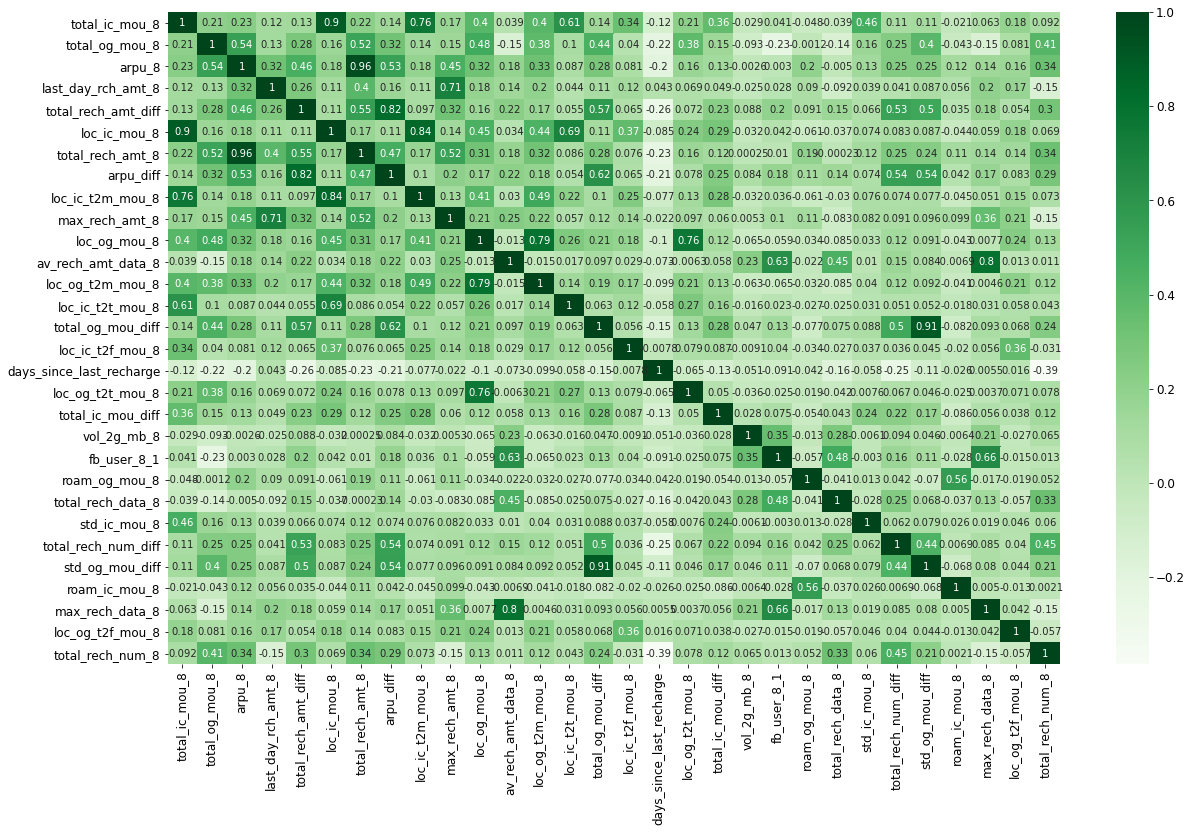

In [160]:
# Plot the Heatmap for correlation
plt.figure(figsize = (20, 12))

sns.heatmap(X_train[top_features].corr(), cmap= 'Greens', annot = True)

#### Handling Multicollinearity

Lets remove  the highly correlated variables: (coorelation > 0.7)
 - loc_ic_mou_8
 - loc_ic_t2m_mou_8
 - loc_ic_t2t_mou_8
 - arpu_8
 - arpu_diff
 - total_ic_mou_8
 - max_rech_amt_8
 - loc_og_t2m_mou_8
 - loc_og_t2t_mou_8
 - max_rech_data_8
 - total_og_mou_diff

In [161]:
## Top features after removing the multicollinearity
top_features = ['total_og_mou_8', 'last_day_rch_amt_8', 'total_rech_amt_diff', 'total_rech_amt_8', 'loc_og_mou_8', 'av_rech_amt_data_8',
                'loc_ic_t2f_mou_8', 'days_since_last_recharge','total_ic_mou_diff','vol_2g_mb_8', 'fb_user_8_1','roam_og_mou_8',
                'total_rech_data_8','std_ic_mou_8','total_rech_num_diff','std_og_mou_diff','roam_ic_mou_8','loc_og_t2f_mou_8', 
                'total_rech_num_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

## Logistic regression with top features identified from Random Forest model 

In [162]:

# Instantiate logistic regression with class_weight to handle class imbalance
lr = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# Define hyperparameter 
params = { 'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10], 'penalty': ['l1', 'l2']}

# create 5 folds. We use StratifiedKFold to preserve class imbalance in dataset
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
grid_search_lr = GridSearchCV(estimator=lr, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [163]:
# fit model
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  95 out of 110 | elapsed:    2.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    2.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight={0: 0.1, 1: 0.9}),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [164]:
## Print best hyperparameters
print("Best AUC: ", grid_search_lr.best_score_)
print("Best hyperparameters: ", grid_search_lr.best_params_)

Best AUC:  0.8855099750457149
Best hyperparameters:  {'C': 5, 'penalty': 'l2'}


In [165]:
## Run the final model with best hyperparameters
lr = LogisticRegression(class_weight={0:0.1, 1: 0.9}, C = 5, penalty = 'l2')

# fit model
lr.fit(X_train, y_train)


LogisticRegression(C=5, class_weight={0: 0.1, 1: 0.9})

### Prediction on Test Dataset

In [166]:

y_pred = lr.predict(X_test)

# create onfusion matrix
confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)


[[7085 1184]
 [ 166  566]]


In [167]:
TP = confusion_m[1,1] # true positive 
TN = confusion_m[0,0] # true negatives
FP = confusion_m[0,1] # false positives
FN = confusion_m[1,0] # false negatives


In [168]:
# Let's see the sensitivity of our logistic regression model
print ("Sensitivity = ", TP / float(TP+FN))

Sensitivity =  0.773224043715847


In [169]:
# Let us calculate specificity
print ("Specificity = ",TN / float(TN+FP))

Specificity =  0.8568146087797799


In [170]:
# Calculate false positive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1431853912202201


In [171]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test, y_pred)

0.8500166648150206

In [172]:
## Predict probability
y_pred_prob = lr.predict_proba(X_test)[:, 1]

## Print AUC (Area under curve) score
auc_score = metrics.roc_auc_score( y_test, y_pred_prob )

print ("AUC Score = ", auc_score)

AUC Score =  0.8742117012186539


In [173]:
## Get the evaluation metrices
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8269
           1       0.32      0.77      0.46       732

    accuracy                           0.85      9001
   macro avg       0.65      0.82      0.68      9001
weighted avg       0.92      0.85      0.88      9001



Among all the metrics , we focus most on Recall or Sensitivity because we want False negatives(churn predicted as non-churn) to be very low. We would rather get some extra false positives(false alarms) over saving some false negatives, i.e., we would rather get some non-churn labeled churn over leaving a churn labeled non-churn.

For this model, Recall is 0.77 which is Good. AUC Score of 0.874 & accuracy of 0.85 is also good. So overall this is a  good model.

### Find the coefficients & intercept from the logistic regression model

In [174]:

# Get the intercept
intercept_df = pd.DataFrame(lr.intercept_.reshape((1,1)), columns = ['intercept'])

# Get the coefficients
coefficients = lr.coef_.reshape((19, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(lr.coef_, columns=logistic_features)

In [175]:
# concatenate dataframes of Coefficients and intercept
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients


intercept  total_og_mou_8  last_day_rch_amt_8  total_rech_amt_diff  \
0      -1.06           -0.28               -0.46                -0.36   

   total_rech_amt_8  loc_og_mou_8  av_rech_amt_data_8  loc_ic_t2f_mou_8  \
0              0.30         -1.02               -0.05             -0.47   

   days_since_last_recharge  total_ic_mou_diff  vol_2g_mb_8  fb_user_8_1  \
0                      0.48              -0.28        -0.22        -0.90   

   roam_og_mou_8  total_rech_data_8  std_ic_mou_8  total_rech_num_diff  \
0           0.19              -0.28         -0.18                -0.11   

   std_og_mou_diff  roam_ic_mou_8  loc_og_t2f_mou_8  total_rech_num_8  
0            -0.18           0.08             -0.13             -0.12

Above are all important predictors which are indicators of churn

### Plot these predictors against churn

<Figure size 1584x2880 with 0 Axes>

Text(0.5, 1.0, 'Total O/G Usage-August')

Text(0.5, 1.0, 'Last day recharge Amount-August')

Text(0.5, 1.0, 'Total Recharge Amount Difference')

Text(0.5, 1.0, 'Total recharge Amount-August')

Text(0.5, 1.0, 'Local O/G Usage-August')

Text(0.5, 1.0, 'Average Data Recharge Amount-August')

Text(0.5, 1.0, 'Local I/C T2F Usage-August')

Text(0.5, 1.0, 'Days since Last Recharge')

Text(0.5, 1.0, 'Total I/C Usage Difference')

Text(0.5, 1.0, 'Volume 2G-August')

Text(0.5, 1.0, 'FB Usage')

Text(0.5, 1.0, 'Roaming O/G Usage-August')

Text(0.5, 1.0, 'Total Recharge Data-August')

Text(0.5, 1.0, 'STD I/C Usage-August')

Text(0.5, 1.0, 'Number of Recharges Difference')

Text(0.5, 1.0, 'STD O/G Usage Difference')

Text(0.5, 1.0, 'Roaming I/C Usage-August')

Text(0.5, 1.0, 'Local O/G T2F Usage-August')

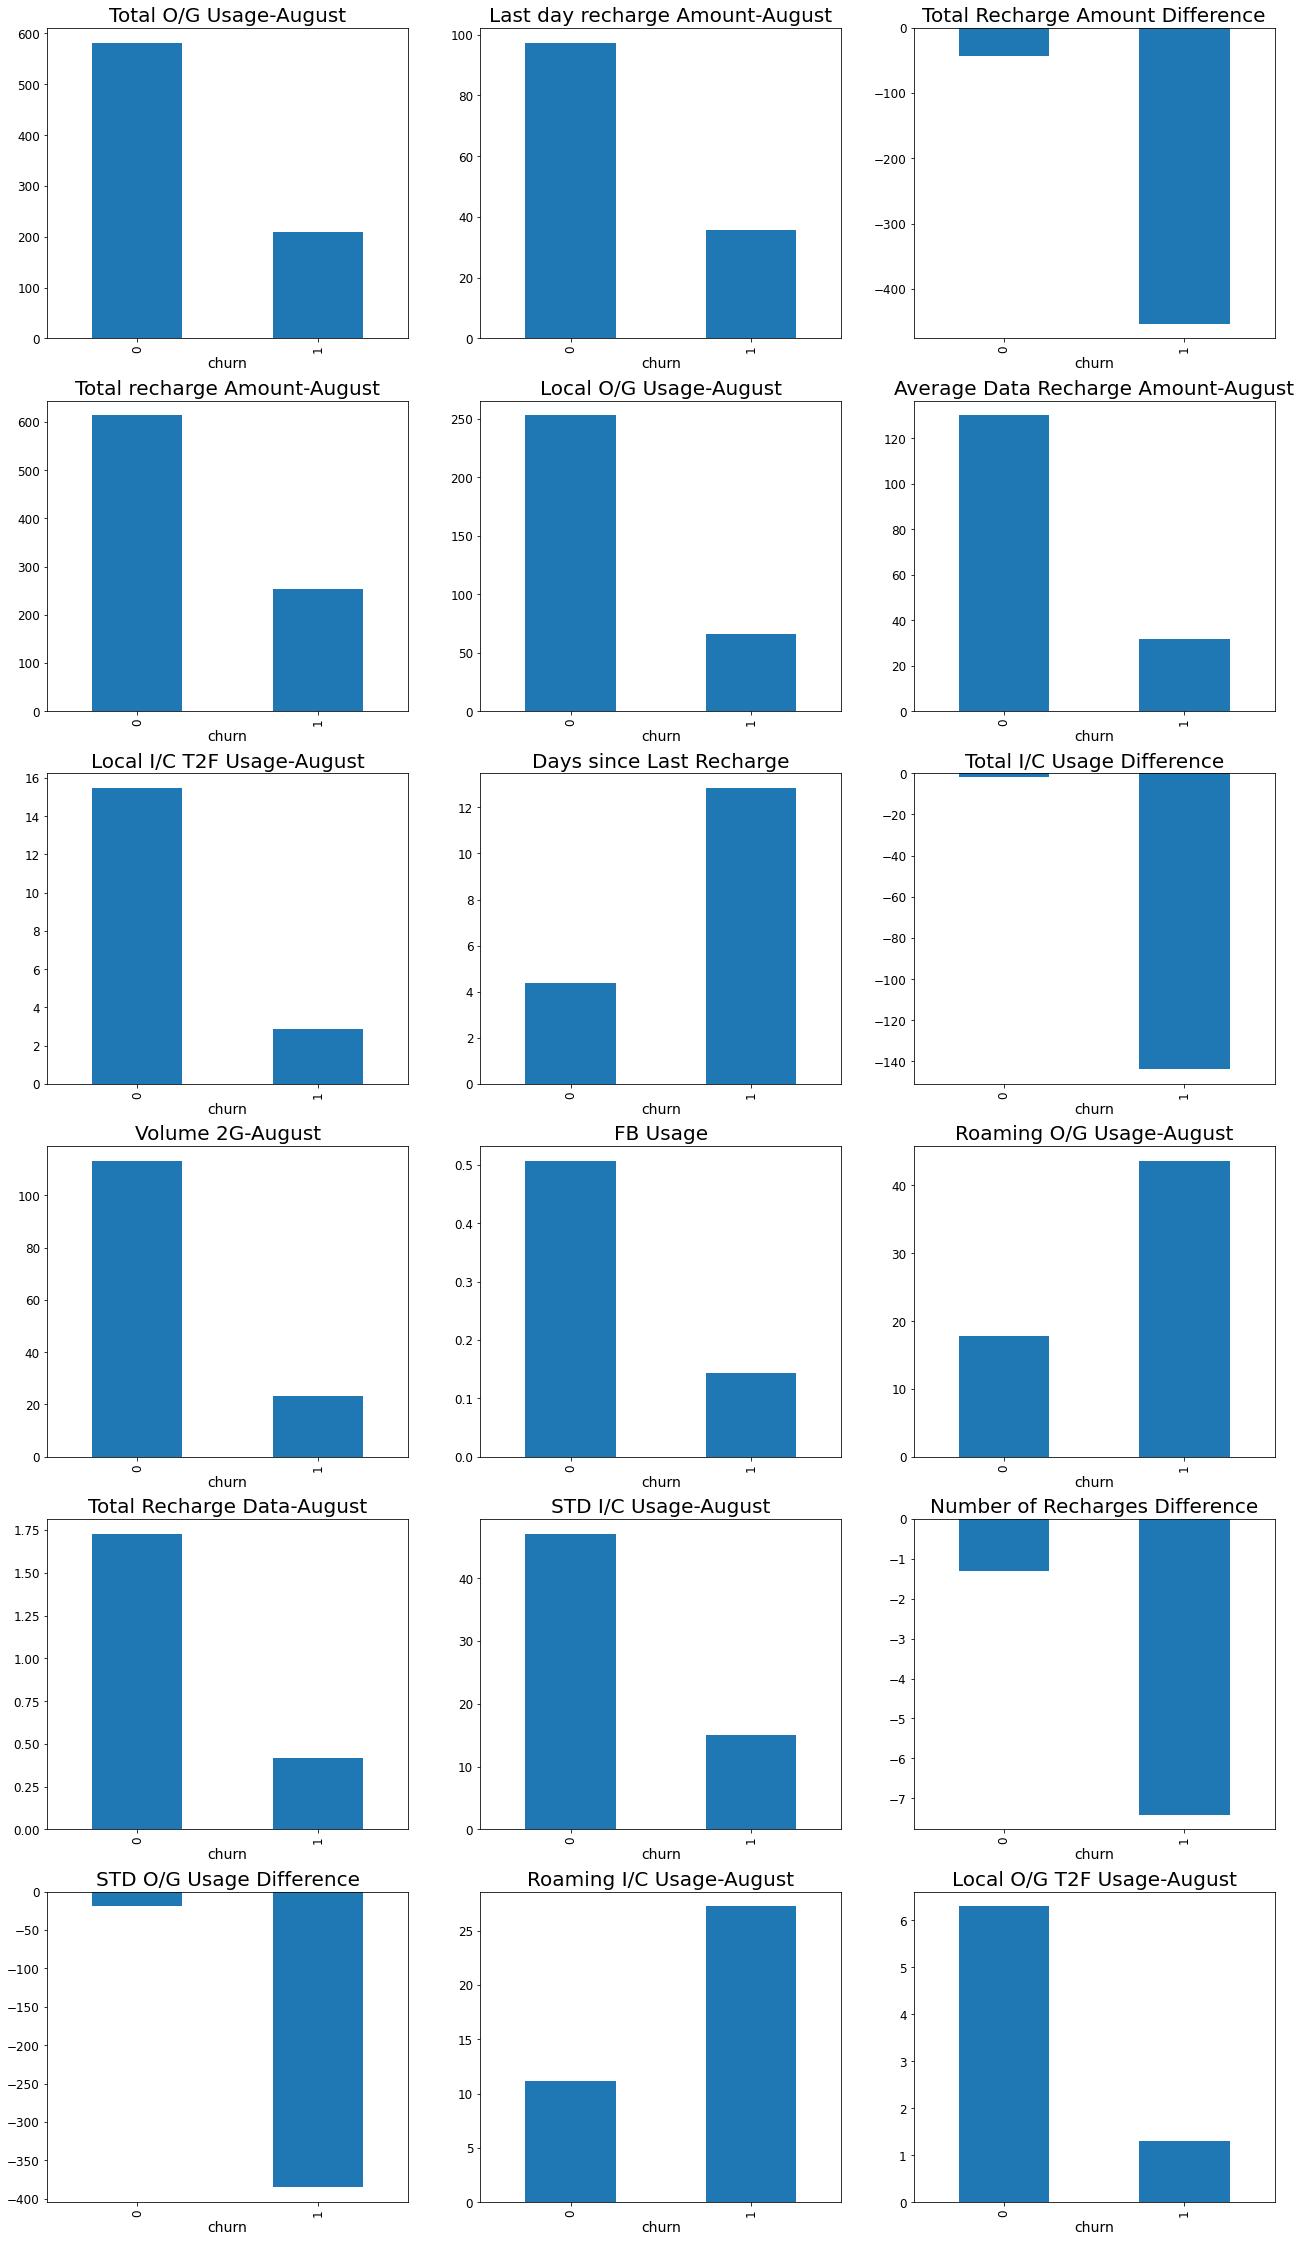

In [178]:

plt.figure(figsize=(22,40))
ax1=plt.subplot(6,3,1)
ax1=telecom.groupby('churn')['total_og_mou_8'].mean().plot.bar(x='Churn',y='total_og_mou_8')
ax1.set_title("Total O/G Usage-August", fontsize = 20)

ax2 =plt.subplot(6,3,2)
ax2=telecom.groupby('churn')['last_day_rch_amt_8'].mean().plot.bar(x='Churn',y='last_day_rch_amt_8')
ax2.set_title("Last day recharge Amount-August", fontsize = 20)

ax3= plt.subplot(6,3,3)
ax3=telecom.groupby('churn')['total_rech_amt_diff'].mean().plot.bar(x='Churn',y='total_rech_amt_diff')
ax3.set_title("Total Recharge Amount Difference", fontsize = 20)

ax4= plt.subplot(6,3,4)
ax4=telecom.groupby('churn')['total_rech_amt_8'].mean().plot.bar(x='Churn',y='total_rech_amt_8')
ax4.set_title("Total recharge Amount-August", fontsize = 20)

ax5=plt.subplot(6,3,5)
ax5=telecom.groupby('churn')['loc_og_mou_8'].mean().plot.bar(x='Churn',y='loc_og_mou_8')
ax5.set_title("Local O/G Usage-August", fontsize = 20)

ax6=plt.subplot(6,3,6)
ax6=telecom.groupby('churn')['av_rech_amt_data_8'].mean().plot.bar(x='Churn',y='av_rech_amt_data_8')
ax6.set_title("Average Data Recharge Amount-August", fontsize = 20)

ax7=plt.subplot(6,3,7)
ax7=telecom.groupby('churn')['loc_ic_t2f_mou_8'].mean().plot.bar(x='Churn',y='loc_ic_t2f_mou_8')
ax7.set_title("Local I/C T2F Usage-August", fontsize = 20)

ax8=plt.subplot(6,3,8)
ax8=telecom.groupby('churn')['days_since_last_recharge'].mean().plot.bar(x='Churn',y='days_since_last_recharge')
ax8.set_title("Days since Last Recharge", fontsize = 20)

ax9=plt.subplot(6,3,9)
ax9=telecom.groupby('churn')['total_ic_mou_diff'].mean().plot.bar(x='Churn',y='total_ic_mou_diff')
ax9.set_title("Total I/C Usage Difference", fontsize = 20)

ax10=plt.subplot(6,3,10)
ax10=telecom.groupby('churn')['vol_2g_mb_8'].mean().plot.bar(x='Churn',y='vol_2g_mb_8')
ax10.set_title("Volume 2G-August", fontsize = 20)

ax11=plt.subplot(6,3,11)
ax11=telecom.groupby('churn')['fb_user_8_1'].mean().plot.bar(x='Churn',y='fb_user_8_1')
ax11.set_title("FB Usage", fontsize = 20)

ax12=plt.subplot(6,3,12)
ax12=telecom.groupby('churn')['roam_og_mou_8'].mean().plot.bar(x='Churn',y='roam_og_mou_8')
ax12.set_title("Roaming O/G Usage-August", fontsize = 20)

ax13=plt.subplot(6,3,13)
ax13=telecom.groupby('churn')['total_rech_data_8'].mean().plot.bar(x='Churn',y='total_rech_data_8')
ax13.set_title("Total Recharge Data-August", fontsize = 20)

ax14=plt.subplot(6,3,14)
ax14=telecom.groupby('churn')['std_ic_mou_8'].mean().plot.bar(x='Churn',y='std_ic_mou_8')
ax14.set_title("STD I/C Usage-August", fontsize = 20)

ax15=plt.subplot(6,3,15)
ax15=telecom.groupby('churn')['total_rech_num_diff'].mean().plot.bar(x='Churn',y='total_rech_num_diff')
ax15.set_title("Number of Recharges Difference", fontsize = 20)


ax16=plt.subplot(6,3,16)
ax16=telecom.groupby('churn')['std_og_mou_diff'].mean().plot.bar(x='Churn',y='std_og_mou_diff')
ax16.set_title("STD O/G Usage Difference", fontsize = 20)

ax17=plt.subplot(6,3,17)
ax17=telecom.groupby('churn')['roam_ic_mou_8'].mean().plot.bar(x='Churn',y='roam_ic_mou_8')
ax17.set_title("Roaming I/C Usage-August", fontsize = 20)

ax18=plt.subplot(6,3,18)
ax18=telecom.groupby('churn')['loc_og_t2f_mou_8'].mean().plot.bar(x='Churn',y='loc_og_t2f_mou_8')
ax18.set_title("Local O/G T2F Usage-August", fontsize = 20)
plt.show()


## Business Insights and Recommendations

 - Roaming Usage of customers who Churn is higher compared those who do not churn. The customers may be churning because of higher roaming rates which would result into high roaming charges. Telecom company need to revisit the roaming calls rates.
 
 - Average Recharge data amount in August is significantly less by Churners , also the number of data recharges. Telecom company should check Data rates-if they are increased recently or the rates are more compared to other companies
 
 - Telecom company should also look into Local & STD rates which is affecting the Local & STD usage by Customers. The difference in usage in August compared to in June & July is higher for churners than for non-churners. Company should come up with new packages & offers for Local & STD calls. 
 
 - Company should track the when the last recharge was done by Customer. Days since last recharge will help the company to get hint about probable churn. More the days since last recharge, more are the chances that Customer will churn
 
 - Company can conduct surveys, collect feedbacks, analyze the Customer complaints and queries to understand the Customers requirements & work accordingly. 